# 온라인 및 오프라인 플랫폼과 구매 기록 간의 상관 관계
- t_dat(구매 일자)
- customer_id(고객 id)
- article_id(제품 번호)
- price(가격)
- sales_channel_id(온/오프라인  1오프라인,2온라인)

# 온라인 고객수와 오프라인 고객수 시각화

In [1]:
df_clothes_name = pd.read_csv(r'D:\머신러닝 프로젝트\data\df_colthes_name.csv')
df_clothes_name.head                                                                                                                                                                                      

<bound method NDFrame.head of                t_dat  customer_label   age  article_id     price  \
0         2018-09-20               7  32.0   505221004  0.015237   
1         2018-09-20           83749  53.0   505221004  0.015237   
2         2018-09-20           87205  23.0   505221004  0.015237   
3         2018-09-20          332514  23.0   505221004  0.015237   
4         2018-09-20          501565  22.0   505221004  0.015237   
...              ...             ...   ...         ...       ...   
22477262  2020-09-22          309856  50.0   886270008  0.045746   
22477263  2020-09-22          309856  50.0   886270008  0.045746   
22477264  2020-09-22         1267138  36.0   860135008  0.038119   
22477265  2020-09-22         1267138  36.0   539060028  0.016017   
22477266  2020-09-22         1267138  36.0   539060028  0.016000   

                          prod_name product_type_name  \
0                       Inca Jumper           Sweater   
1                       Inca Jumper    

In [2]:
transactions_train = pd.read_csv(r'D:\머신러닝 프로젝트\h-and-m-personalized-fashion-recommendations (1)\transactions_train.csv')
transactions_train

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


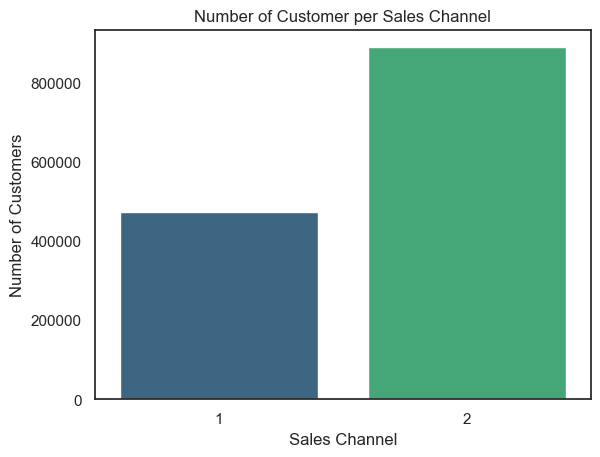

In [3]:
#customer_id 중복을 제거하여 온, 오프라인 고객 시각화
channel_customer_counts = transactions_train.drop_duplicates('customer_id').groupby('sales_channel_id').size()

sns.barplot(x= channel_customer_counts.index, y=channel_customer_counts.values, palette="viridis")
plt.ylabel('Number of Customers')
plt.xlabel('Sales Channel')
plt.title('Number of Customer per Sales Channel')
plt.show()            

# 온라인 고객의 구매량이 정말 많은지 확인하기

In [4]:
# 불필요 컬럼 삭제
df_clothes_name = df_clothes_name.drop(['graphical_appearance_name','perceived_colour_master_name','garment_group_name'],axis=1)
df_clothes_name

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name
0,2018-09-20,7,32.0,505221004,0.015237,Inca Jumper,Sweater
1,2018-09-20,83749,53.0,505221004,0.015237,Inca Jumper,Sweater
2,2018-09-20,87205,23.0,505221004,0.015237,Inca Jumper,Sweater
3,2018-09-20,332514,23.0,505221004,0.015237,Inca Jumper,Sweater
4,2018-09-20,501565,22.0,505221004,0.015237,Inca Jumper,Sweater
...,...,...,...,...,...,...,...
22477262,2020-09-22,309856,50.0,886270008,0.045746,Balloon Pleat fit,Trousers
22477263,2020-09-22,309856,50.0,886270008,0.045746,Balloon Pleat fit,Trousers
22477264,2020-09-22,1267138,36.0,860135008,0.038119,Pat ls bd plaid,Shirt
22477265,2020-09-22,1267138,36.0,539060028,0.016017,TP BOSSE fancy OH hood SB,Hoodie


In [5]:
# concat 사용 
#merger를 할려고 했으나 가400기? 메모리를 요구하기에 concat 사용했습니다(결측치는 어쩔수가 없다!)

concat_df = pd.concat([df_clothes_name, transactions_train], axis=0, ignore_index=True)

concat_df

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,customer_id,sales_channel_id
0,2018-09-20,7.0,32.0,505221004,0.015237,Inca Jumper,Sweater,NaN,NaN
1,2018-09-20,83749.0,53.0,505221004,0.015237,Inca Jumper,Sweater,NaN,NaN
2,2018-09-20,87205.0,23.0,505221004,0.015237,Inca Jumper,Sweater,NaN,NaN
3,2018-09-20,332514.0,23.0,505221004,0.015237,Inca Jumper,Sweater,NaN,NaN
4,2018-09-20,501565.0,22.0,505221004,0.015237,Inca Jumper,Sweater,NaN,NaN
...,...,...,...,...,...,...,...,...,...
54265586,2020-09-22,NaN,NaN,929511001,0.059305,NaN,NaN,fff2282977442e327b45d8c89afde25617d00124d0f999...,2.0
54265587,2020-09-22,NaN,NaN,891322004,0.042356,NaN,NaN,fff2282977442e327b45d8c89afde25617d00124d0f999...,2.0
54265588,2020-09-22,NaN,NaN,918325001,0.043203,NaN,NaN,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,1.0
54265589,2020-09-22,NaN,NaN,833459002,0.006763,NaN,NaN,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,1.0


# 18~19년도 월별 온,오프라인 제품 분류 시각화

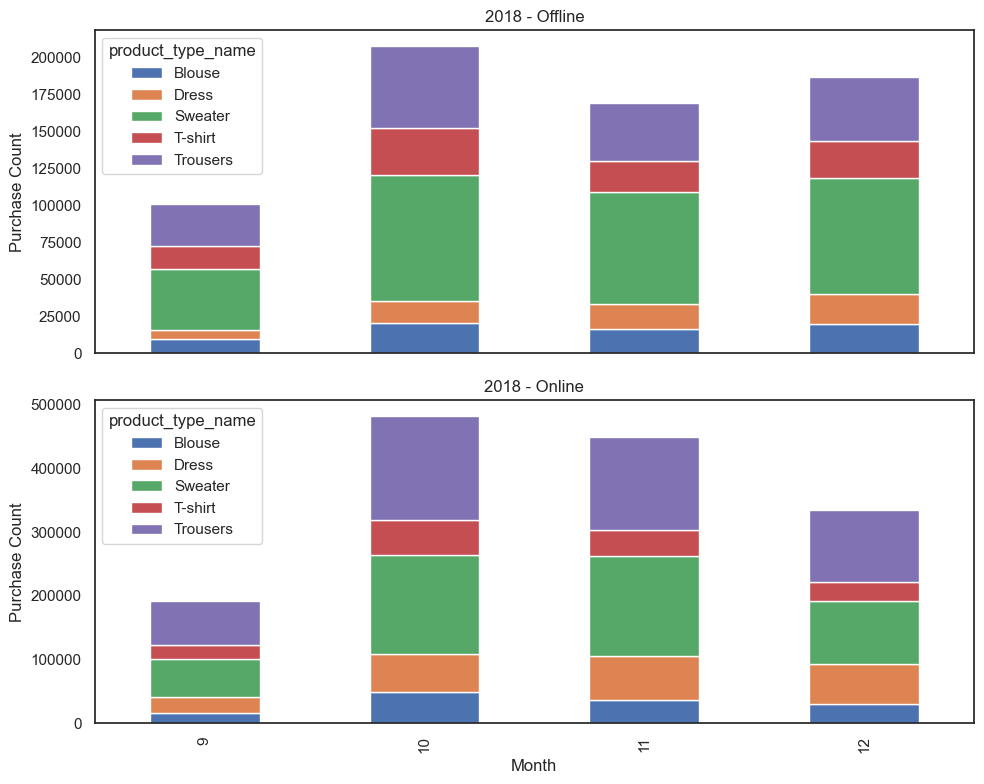

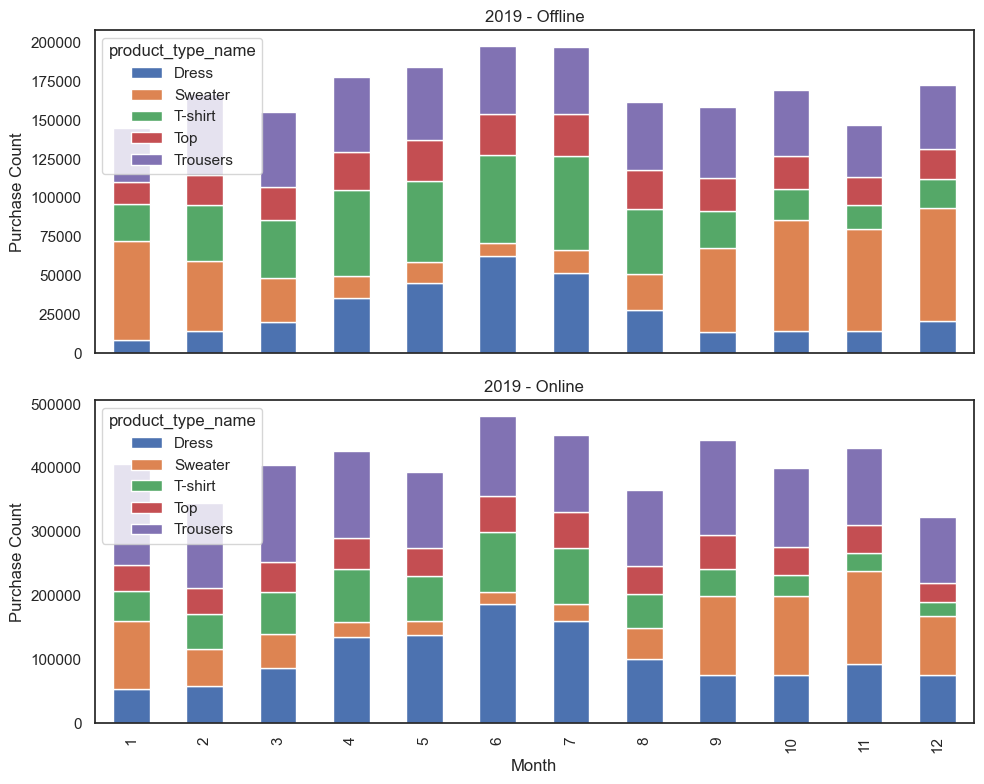

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
article_to_product_type = pd.Series(df_clothes_name.product_type_name.values, index=df_clothes_name.article_id).to_dict()

transactions_train['product_type_name'] = transactions_train['article_id'].map(article_to_product_type)

transactions_train['t_dat'] = pd.to_datetime(transactions_train['t_dat'])
transactions_train['year'] = transactions_train['t_dat'].dt.year
transactions_train['month'] = transactions_train['t_dat'].dt.month


transactions_train = transactions_train.dropna(subset=['product_type_name'])


grouped = transactions_train.groupby(['year', 'month', 'sales_channel_id', 'product_type_name']).size().reset_index(name='purchase_count')
data_2018 = grouped[grouped['year'] == 2018]
data_2019 = grouped[grouped['year'] == 2019]

def plot_purchase_data(data, year):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    for i, channel in enumerate([1, 2]):
        channel_data = data[data['sales_channel_id'] == channel]
        top_products = channel_data.groupby('product_type_name')['purchase_count'].sum().nlargest(5).index
        channel_data_top_products = channel_data[channel_data['product_type_name'].isin(top_products)]
        pivot_data = channel_data_top_products.pivot(index='month', columns='product_type_name', values='purchase_count')
        pivot_data.plot(kind='bar', stacked=True, ax=ax[i])
        ax[i].set_title(f"{year} - {'Offline' if channel == 1 else 'Online'}")
        ax[i].set_ylabel('Purchase Count')
    plt.xlabel('Month')
    plt.tight_layout()
    plt.show()

# 시각화 수행
plot_purchase_data(data_2018, 2018)
plot_purchase_data(data_2019, 2019)

# dfd

In [9]:
concat_df

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,customer_id,sales_channel_id
0,2018-09-20,7.0,32.0,505221004,0.015237,Inca Jumper,Sweater,NaN,NaN
1,2018-09-20,83749.0,53.0,505221004,0.015237,Inca Jumper,Sweater,NaN,NaN
2,2018-09-20,87205.0,23.0,505221004,0.015237,Inca Jumper,Sweater,NaN,NaN
3,2018-09-20,332514.0,23.0,505221004,0.015237,Inca Jumper,Sweater,NaN,NaN
4,2018-09-20,501565.0,22.0,505221004,0.015237,Inca Jumper,Sweater,NaN,NaN
...,...,...,...,...,...,...,...,...,...
54265586,2020-09-22,NaN,NaN,929511001,0.059305,NaN,NaN,fff2282977442e327b45d8c89afde25617d00124d0f999...,2.0
54265587,2020-09-22,NaN,NaN,891322004,0.042356,NaN,NaN,fff2282977442e327b45d8c89afde25617d00124d0f999...,2.0
54265588,2020-09-22,NaN,NaN,918325001,0.043203,NaN,NaN,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,1.0
54265589,2020-09-22,NaN,NaN,833459002,0.006763,NaN,NaN,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,1.0


# 악세서리 데이터 분석

In [2]:
import pandas as pd
import numpy as np
df_clothes_name = pd.read_csv(r'D:\머신러닝 프로젝트\data\df_colthes_name.csv')
df_clothes_name

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name
0,2018-09-20,7,32.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear
1,2018-09-20,83749,53.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear
2,2018-09-20,87205,23.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear
3,2018-09-20,332514,23.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear
4,2018-09-20,501565,22.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear
...,...,...,...,...,...,...,...,...,...,...
22477262,2020-09-22,309856,50.0,886270008,0.045746,Balloon Pleat fit,Trousers,Denim,Blue,Trousers Denim
22477263,2020-09-22,309856,50.0,886270008,0.045746,Balloon Pleat fit,Trousers,Denim,Blue,Trousers Denim
22477264,2020-09-22,1267138,36.0,860135008,0.038119,Pat ls bd plaid,Shirt,Check,Khaki green,Shirts
22477265,2020-09-22,1267138,36.0,539060028,0.016017,TP BOSSE fancy OH hood SB,Hoodie,All over pattern,Orange,Jersey Basic


In [3]:
df_clothes_name.head()

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name
0,2018-09-20,7,32.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear
1,2018-09-20,83749,53.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear
2,2018-09-20,87205,23.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear
3,2018-09-20,332514,23.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear
4,2018-09-20,501565,22.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear


In [4]:
#제품 대분류의 unique 값 확인 의류와 관련이 없는 악세서리 이름찾기
df_clothes_name['product_type_name'].unique()

array(['Sweater', 'Skirt', 'Trousers', 'Dress', 'Leggings/Tights', 'Top',
       'Vest top', 'Blouse', 'Shorts', 'Jumpsuit/Playsuit', 'Coat',
       'Jacket', 'Bra', 'Cardigan', 'T-shirt', 'Shirt', 'Hoodie',
       'Costumes', 'Pyjama set', 'Blazer', nan, 'Bikini top',
       'Garment Set', 'Dungarees', 'Bodysuit', 'Bootie', 'Polo shirt',
       'Swimsuit', 'Swimwear bottom', 'Pyjama bottom',
       'Outdoor Waistcoat', 'Socks', 'Underwear bottom',
       'Other accessories', 'Cap/peaked', 'Scarf',
       'Pyjama jumpsuit/playsuit', 'Robe', 'Tailored Waistcoat',
       'Outdoor overall', 'Night gown', 'Beanie', 'Outdoor trousers',
       'Gloves', 'Hat/beanie', 'Sleeping sack'], dtype=object)

In [5]:
# Other accessories 악세서리 
df_clothes_name = df_clothes_name[df_clothes_name['product_type_name'] =='Other accessories']
df_clothes_name

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name
10395119,2018-09-20,31352,53.0,662320001,0.005068,Pride Lanyard,Other accessories,Stripe,Black,Jersey Fancy
10395120,2018-10-18,739755,38.0,662320001,0.003373,Pride Lanyard,Other accessories,Stripe,Black,Jersey Fancy
10395121,2018-10-22,739755,38.0,662320001,0.003373,Pride Lanyard,Other accessories,Stripe,Black,Jersey Fancy
10395122,2018-10-22,739755,38.0,662320001,0.003373,Pride Lanyard,Other accessories,Stripe,Black,Jersey Fancy
10395123,2018-11-08,1350053,25.0,662320001,0.002695,Pride Lanyard,Other accessories,Stripe,Black,Jersey Fancy
...,...,...,...,...,...,...,...,...,...,...
22385240,2018-11-22,550251,27.0,513692001,0.004051,Scrattchmittens,Other accessories,Solid,White,Jersey Fancy
22385241,2018-12-11,1197556,32.0,513692001,0.004576,Scrattchmittens,Other accessories,Solid,White,Jersey Fancy
22385242,2018-12-15,314422,41.0,513692001,0.001695,Scrattchmittens,Other accessories,Solid,White,Jersey Fancy
22385243,2018-12-15,314422,41.0,513692001,0.001695,Scrattchmittens,Other accessories,Solid,White,Jersey Fancy


In [6]:
df_clothes_name['article_id'].unique()
df_clothes_name

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name
10395119,2018-09-20,31352,53.0,662320001,0.005068,Pride Lanyard,Other accessories,Stripe,Black,Jersey Fancy
10395120,2018-10-18,739755,38.0,662320001,0.003373,Pride Lanyard,Other accessories,Stripe,Black,Jersey Fancy
10395121,2018-10-22,739755,38.0,662320001,0.003373,Pride Lanyard,Other accessories,Stripe,Black,Jersey Fancy
10395122,2018-10-22,739755,38.0,662320001,0.003373,Pride Lanyard,Other accessories,Stripe,Black,Jersey Fancy
10395123,2018-11-08,1350053,25.0,662320001,0.002695,Pride Lanyard,Other accessories,Stripe,Black,Jersey Fancy
...,...,...,...,...,...,...,...,...,...,...
22385240,2018-11-22,550251,27.0,513692001,0.004051,Scrattchmittens,Other accessories,Solid,White,Jersey Fancy
22385241,2018-12-11,1197556,32.0,513692001,0.004576,Scrattchmittens,Other accessories,Solid,White,Jersey Fancy
22385242,2018-12-15,314422,41.0,513692001,0.001695,Scrattchmittens,Other accessories,Solid,White,Jersey Fancy
22385243,2018-12-15,314422,41.0,513692001,0.001695,Scrattchmittens,Other accessories,Solid,White,Jersey Fancy


In [7]:
# prod_name컬럼 unique 확인
#pride Lanyard (열쇠고리, 사원증?)
#SPORT Karin padded bra(여성 스포츠 브레지어)
#Scratchmittens(아기 보호 장갑)
#Foxy Fur stol

#Scrattchmittens 2개 존재하는데 이것은 단순 타자 오류인가 아니면 서로 다른 구분인가

df_clothes_name['prod_name'].unique()

array(['Pride Lanyard', 'SPORT Karin padded bra.', 'Scratchmittens.',
       'Foxy Fur stola', 'Scrattchmittens'], dtype=object)

# Scratchmittens., Scrattchmittens    오타여부 확인

In [8]:
#scrattchmittens의 제품을 확인해보자(article_id 제품 번호로  단순오타인지 서로 다른 제품인지 확인)
df_clothes_name1 = df_clothes_name[df_clothes_name['prod_name'] =='Scratchmittens.']
article_ids = df_clothes_name1['article_id']
article_ids

16943076    737169003
16943077    737169003
16943078    737169003
16943079    737169003
16943080    737169003
              ...    
16943159    737169003
16943160    737169003
16943161    737169003
16943162    737169003
16943163    737169003
Name: article_id, Length: 88, dtype: int64

In [9]:
#확인 결과 제품 article_id가 다른것을 보아 서로 다른 컬럼이다.

df_clothes_name2 = df_clothes_name[df_clothes_name['prod_name']=='Scrattchmittens']
article_ids2 = df_clothes_name2['article_id']
article_ids2

22385231    513692001
22385232    513692001
22385233    513692001
22385234    513692001
22385235    513692001
22385236    513692001
22385237    513692001
22385238    513692001
22385239    513692001
22385240    513692001
22385241    513692001
22385242    513692001
22385243    513692001
22385244    513692001
Name: article_id, dtype: int64

In [12]:
df_clothes_name.head(6)

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name
10395119,2018-09-20,31352,53.0,662320001,0.005068,Pride Lanyard,Other accessories,Stripe,Black,Jersey Fancy
10395120,2018-10-18,739755,38.0,662320001,0.003373,Pride Lanyard,Other accessories,Stripe,Black,Jersey Fancy
10395121,2018-10-22,739755,38.0,662320001,0.003373,Pride Lanyard,Other accessories,Stripe,Black,Jersey Fancy
10395122,2018-10-22,739755,38.0,662320001,0.003373,Pride Lanyard,Other accessories,Stripe,Black,Jersey Fancy
10395123,2018-11-08,1350053,25.0,662320001,0.002695,Pride Lanyard,Other accessories,Stripe,Black,Jersey Fancy
10395124,2018-11-01,417323,43.0,662320001,0.003373,Pride Lanyard,Other accessories,Stripe,Black,Jersey Fancy


# 제일 많이 팔린 제품 시각화

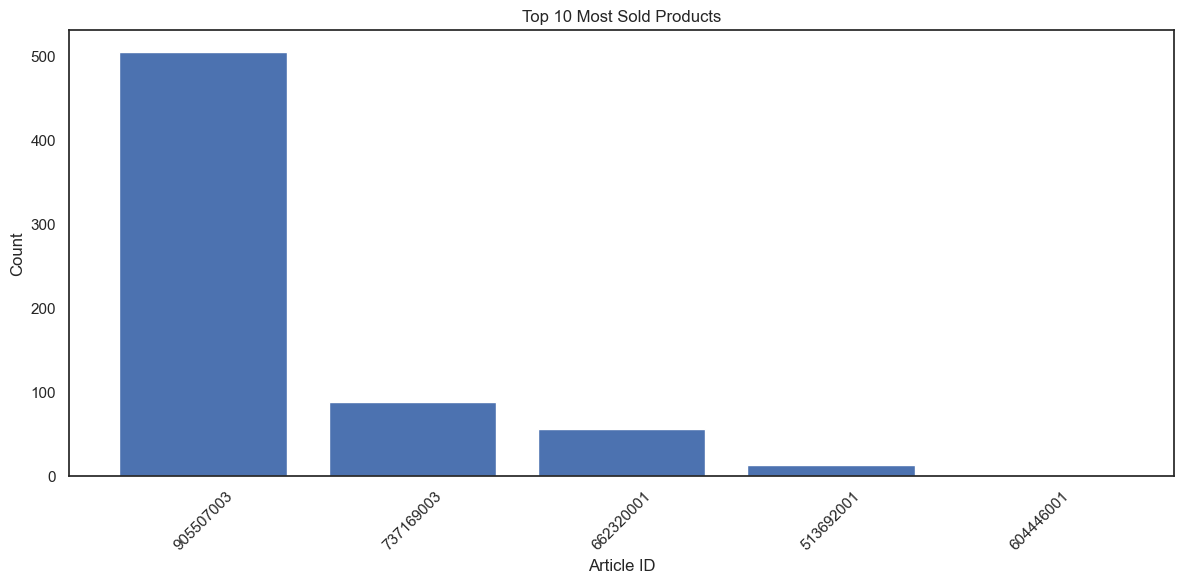

In [11]:
article_counts = df_clothes_name.groupby('article_id').size().reset_index(name='count')
article_counts_sorted = article_counts.sort_values(by='count', ascending=False)

N = 10
article_counts_sorted_topN = article_counts_sorted.head(N)
plt.figure(figsize=(12,6))
plt.bar(article_counts_sorted_topN['article_id'].astype(str), article_counts_sorted_topN['count'])
plt.xlabel('Article ID')
plt.ylabel('Count')
plt.title('Top ' + str(N) + ' Most Sold Products')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


# 부족한 데이터를 전처리 해보기

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns

articles = pd.read_csv(r'D:\머신러닝 프로젝트\h-and-m-personalized-fashion-recommendations (1)\articles.csv')
customers = pd.read_csv(r'D:\머신러닝 프로젝트\h-and-m-personalized-fashion-recommendations (1)\customers.csv')
transactions = pd.read_csv(r'D:\머신러닝 프로젝트\h-and-m-personalized-fashion-recommendations (1)\transactions_train.csv')

In [34]:
articles.head(1)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [35]:
pd.options.display.max_rows = 60 #전체행 출력 옵션 멈추기

In [36]:
article_df = articles[['article_id', 'product_type_name', 'section_name']]
article_df.head()


,article_id,product_type_name,section_name
0,108775015,Vest top,Womens Everyday Basics
1,108775044,Vest top,Womens Everyday Basics
2,108775051,Vest top,Womens Everyday Basics
3,110065001,Bra,Womens Lingerie
4,110065002,Bra,Womens Lingerie


In [37]:
# product_type_name에서 악세서리 행을 추출해보기
unique_values = article_df[article_df['product_type_name'] == 'Baby Bib']['product_type_name'].unique()
unique_values

array(['Baby Bib'], dtype=object)

In [38]:

# product_type_name에서 악세서리에 해당한 데이터 리스트로 만들기
product_type_list = [
    "Accessories set", "Alice band", "Baby Bib", "Bag", "Beanie", "Belt", 
    "Bracelet", "Braces", "Bucket hat", "Cap", "Cap/peaked", "Dog Wear", 
    "Earring", "Earrings", "Eyeglasses", "Felt hat", "Giftbox", "Gloves", 
    "Hair clip", "Hair string", "Hair ties", "Hair/alice band", "Hairband", 
    "Hat/beanie", "Hat/brim", "Headband", "Necklace", "Other accessories", 
    "Ring", "Scarf", "Soft Toys", "Straw hat", "Sunglasses", "Tie", 
    "Umbrella", "Wallet", "Watch"
]



filtered_rows = []
for index, row in article_df.iterrows():
    if row['product_type_name'] in product_type_list:
        filtered_rows.append(row)

filtered_article_df = pd.DataFrame(filtered_rows)
filtered_article_df.head(5)

,article_id,product_type_name,section_name
28,126589006,Hair clip,Womens Small accessories
29,126589007,Hair clip,Womens Small accessories
30,126589010,Hair clip,Womens Small accessories
31,126589011,Hair clip,Womens Small accessories
32,126589012,Hair clip,Womens Small accessories


In [39]:
filtered_article_df.head

<bound method NDFrame.head of         article_id  product_type_name                    section_name
28       126589006          Hair clip        Womens Small accessories
29       126589007          Hair clip        Womens Small accessories
30       126589010          Hair clip        Womens Small accessories
31       126589011          Hair clip        Womens Small accessories
32       126589012          Hair clip        Womens Small accessories
...            ...                ...                             ...
105517   947509001               Belt          Womens Big accessories
105518   947528001            Earring        Womens Small accessories
105519   947538001            Earring        Womens Small accessories
105533   950449002  Other accessories  Kids Accessories, Swimwear & D
105540   957375001          Hair clip             Divided Accessories

[11139 rows x 3 columns]>

# transcation과 filtered_article_df 데이터프레임 merge
# 제대로 merge가 되었는지 확인해보기

In [40]:
transactions.head(2)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2


In [41]:
filtered_article_df.head(3)

,article_id,product_type_name,section_name
28,126589006,Hair clip,Womens Small accessories
29,126589007,Hair clip,Womens Small accessories
30,126589010,Hair clip,Womens Small accessories


In [42]:
merged_df = pd.merge(transactions,filtered_article_df, on='article_id', how='inner')

In [130]:
merged_df

,t_dat,customer_id,article_id,price,sales_channel_id,product_type_name,section_name
0,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,553139001,0.033881,2,Belt,Womens Big accessories
623,2018-09-20,002b3c0a44a22c45a8d62ea9d2b88d1a89e335f8b84003...,673531001,0.008458,2,Other accessories,"Kids Accessories, Swimwear & D"
655,2018-09-20,00401a367c5ac085cb9d4b77c56f3edcabf25153615db9...,633675001,0.010153,2,Hair/alice band,"Kids Accessories, Swimwear & D"
728,2018-09-20,005c9fb2ba6c49b2098a662f64a9124ef95cbec5fcf4eb...,560783010,0.005068,2,Bag,Divided Accessories
735,2018-09-20,005c9fb2ba6c49b2098a662f64a9124ef95cbec5fcf4eb...,660150001,0.005068,2,Bracelet,Men Accessories
...,...,...,...,...,...,...,...
1600354,2020-09-22,95c528ca0b76b066f203e7abe470ddcf3777c6810e4e29...,881049002,0.008458,1,Gloves,Womens Big accessories
1600355,2020-09-22,ad3f0f61f71e1bdf425bbdd45bc9c9915bf35e12c7d294...,936600001,0.013542,2,Other accessories,Womens Small accessories
1600356,2020-09-22,c0247cf307c024f4c13395e3fa451d7c2a355d40d35271...,933607001,0.013542,2,Belt,Womens Big accessories
1600357,2020-09-22,cfe2654a9b89ceccd12078041578ec6a5cec1b94c4ba9b...,921829001,0.018627,2,Scarf,Divided Accessories


In [46]:
# row 가 많아서 drop_duplicates로 첫번쨰 값을 제외한 중복값 제거해보기
#출력 결과 row의 변화가 없음으로 중복은 없다고 판단
merged_df = merged_df.drop_duplicates(subset='article_id', keep= 'first')
merged_df

,t_dat,customer_id,article_id,price,sales_channel_id,product_type_name,section_name
0,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,553139001,0.033881,2,Belt,Womens Big accessories
623,2018-09-20,002b3c0a44a22c45a8d62ea9d2b88d1a89e335f8b84003...,673531001,0.008458,2,Other accessories,"Kids Accessories, Swimwear & D"
655,2018-09-20,00401a367c5ac085cb9d4b77c56f3edcabf25153615db9...,633675001,0.010153,2,Hair/alice band,"Kids Accessories, Swimwear & D"
728,2018-09-20,005c9fb2ba6c49b2098a662f64a9124ef95cbec5fcf4eb...,560783010,0.005068,2,Bag,Divided Accessories
735,2018-09-20,005c9fb2ba6c49b2098a662f64a9124ef95cbec5fcf4eb...,660150001,0.005068,2,Bracelet,Men Accessories
...,...,...,...,...,...,...,...
1600354,2020-09-22,95c528ca0b76b066f203e7abe470ddcf3777c6810e4e29...,881049002,0.008458,1,Gloves,Womens Big accessories
1600355,2020-09-22,ad3f0f61f71e1bdf425bbdd45bc9c9915bf35e12c7d294...,936600001,0.013542,2,Other accessories,Womens Small accessories
1600356,2020-09-22,c0247cf307c024f4c13395e3fa451d7c2a355d40d35271...,933607001,0.013542,2,Belt,Womens Big accessories
1600357,2020-09-22,cfe2654a9b89ceccd12078041578ec6a5cec1b94c4ba9b...,921829001,0.018627,2,Scarf,Divided Accessories


# customer의 age 가지고 오기

In [47]:
customers2 = customers[['age','customer_id']]

In [48]:
customers2.head(5)

,age,customer_id
0,49.0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...
1,25.0,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...
2,24.0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
3,54.0,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...
4,52.0,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...


In [63]:

merged_df2 = merged_df.drop_duplicates(subset='article_id', keep= 'first')
merged_df2.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_type_name,section_name
0,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,553139001,0.033881,2,Belt,Womens Big accessories
623,2018-09-20,002b3c0a44a22c45a8d62ea9d2b88d1a89e335f8b84003...,673531001,0.008458,2,Other accessories,"Kids Accessories, Swimwear & D"
655,2018-09-20,00401a367c5ac085cb9d4b77c56f3edcabf25153615db9...,633675001,0.010153,2,Hair/alice band,"Kids Accessories, Swimwear & D"


In [65]:
merged_df2 = pd.merge(merged_df2, customers2, on='customer_id', how='inner')

# 제품 시각화

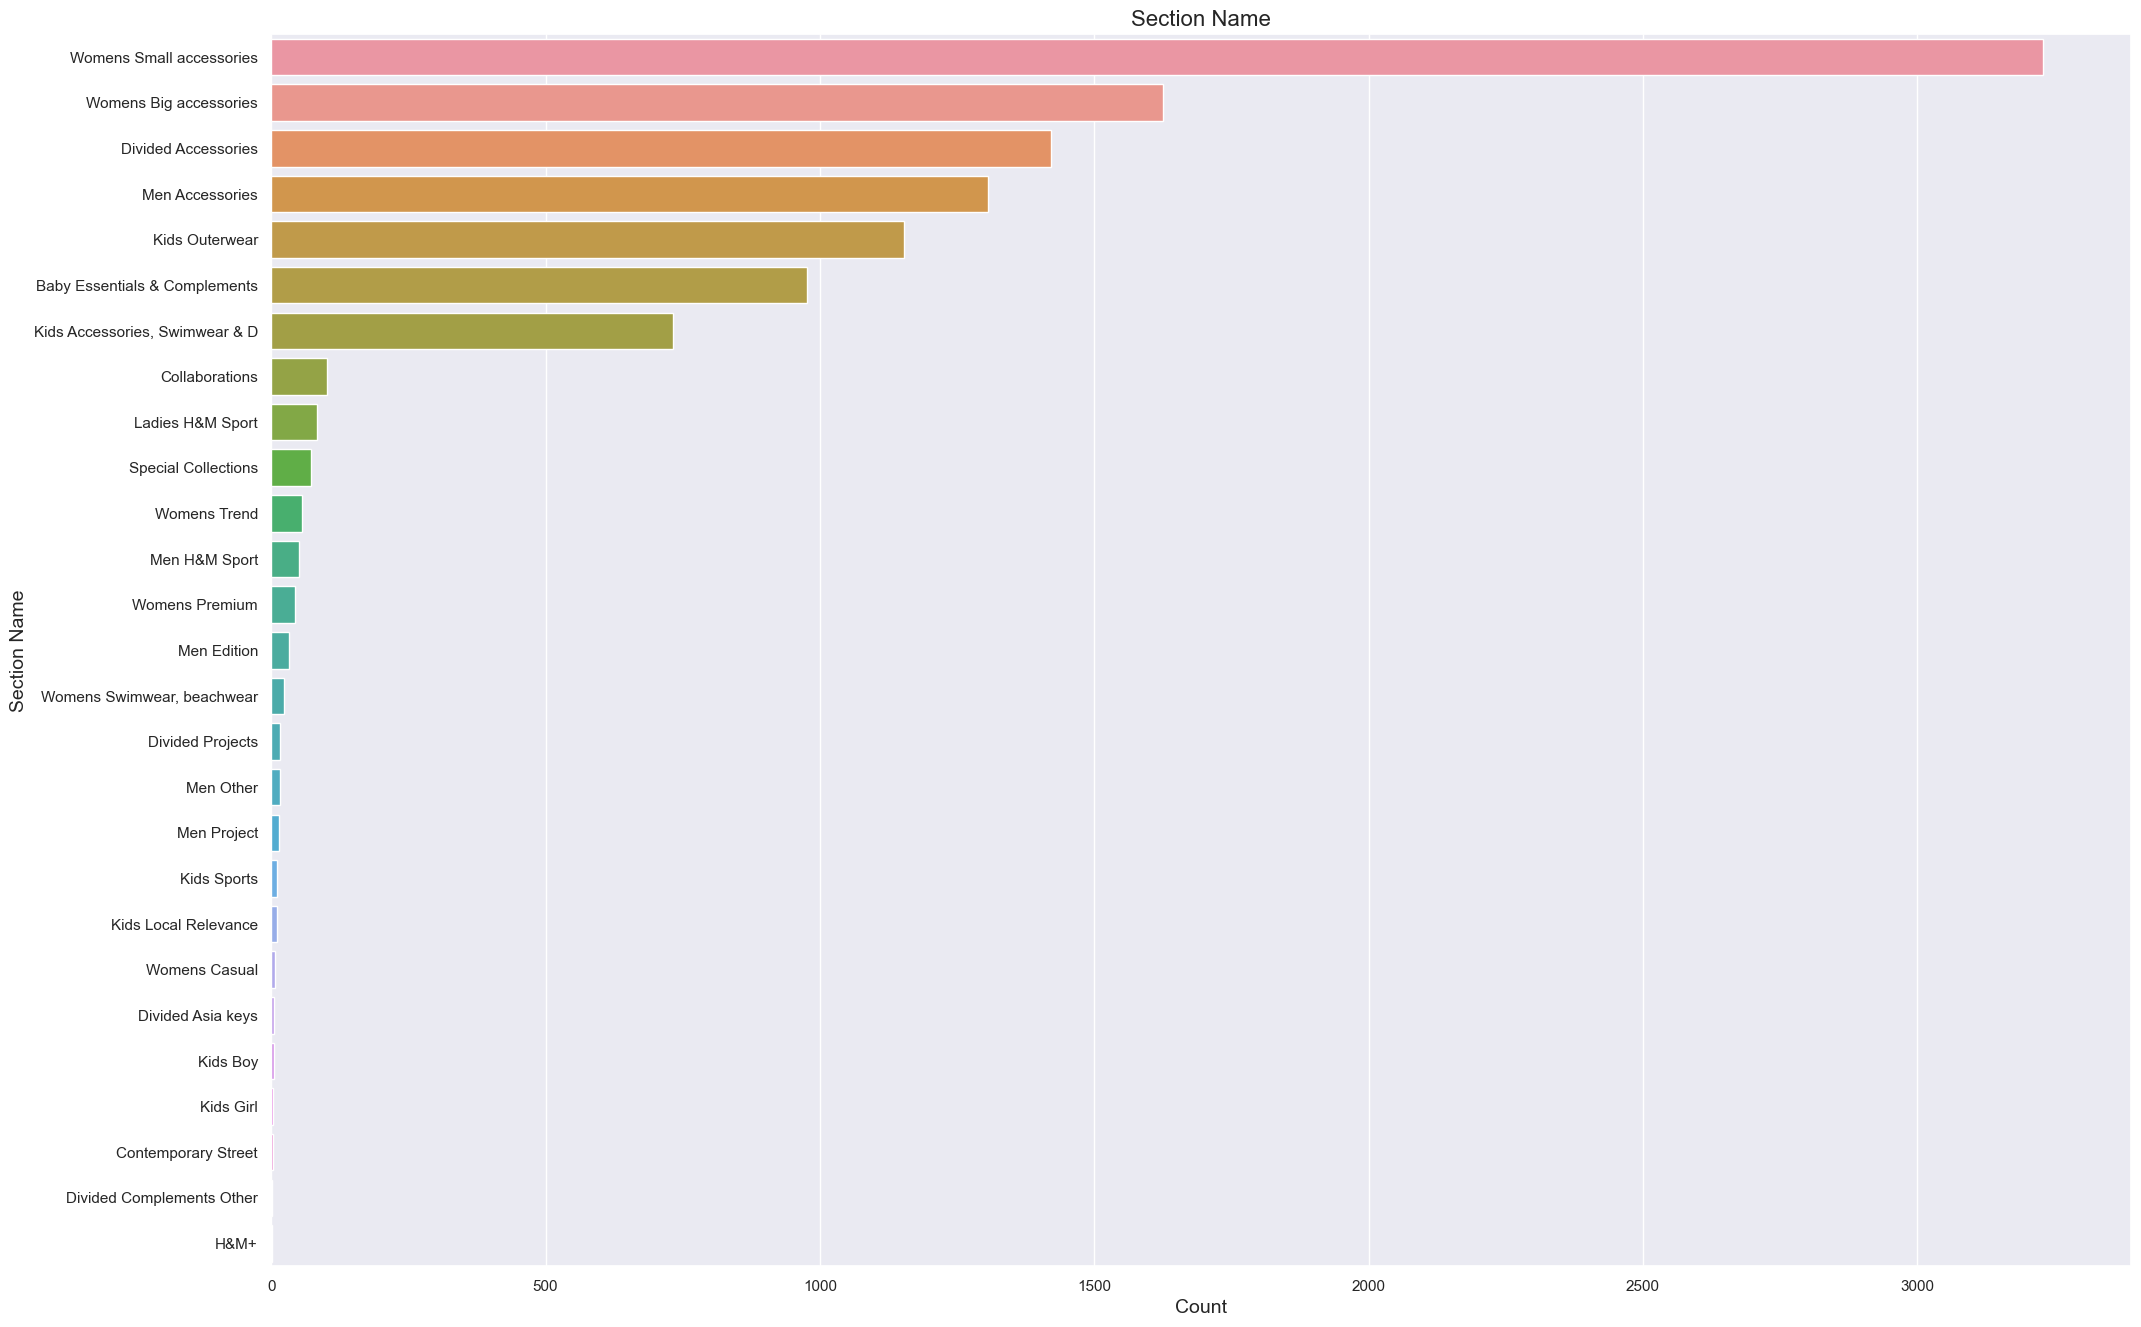

In [131]:
# 어떤 섹션이 가장 많을까

de = merged_df2['section_name'].value_counts().index
plt.figure(figsize=(24,16))
sns.countplot(data=merged_df2, y='section_name', order=de)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Section Name', fontsize=14)
plt.title('Section Name',fontsize=16)
plt.show()

# 악세서리 분류별 가격 분포도와 outlier

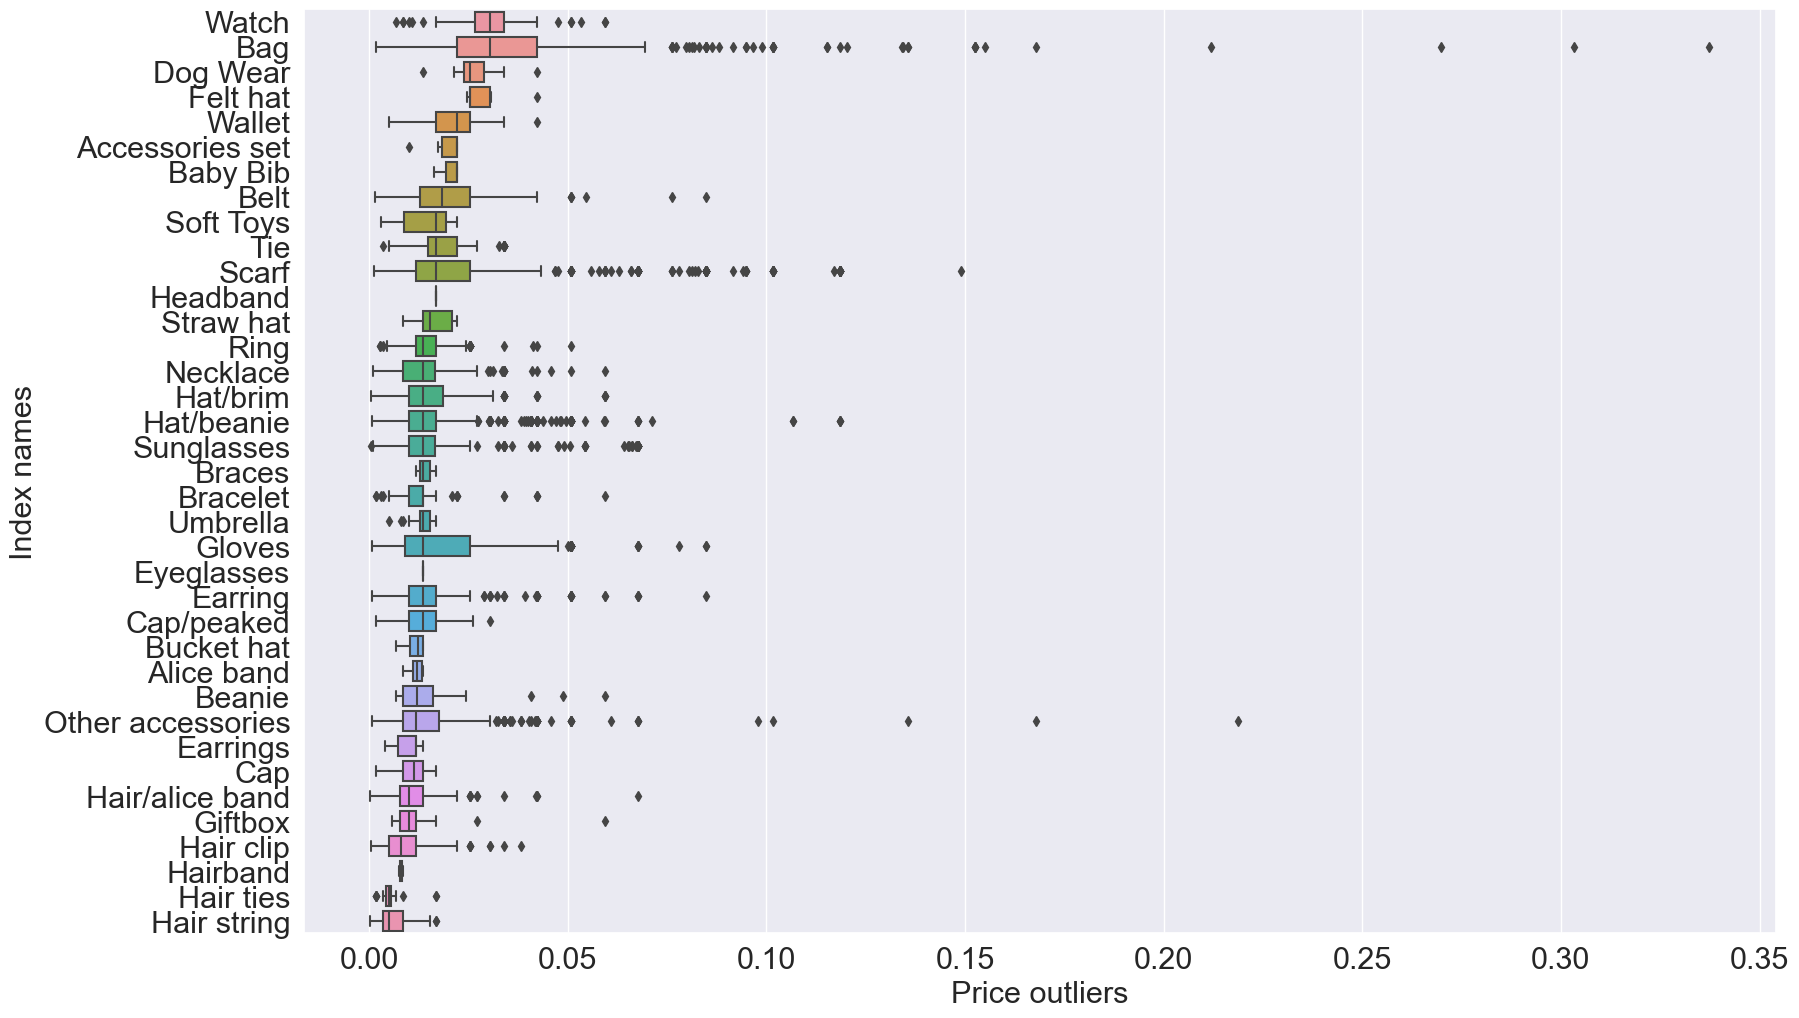

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt


order = merged_df2.groupby('product_type_name')['price'].median().sort_values(ascending=False).index

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(19,12))
ax = sns.boxplot(data=merged_df2, x='price', y='product_type_name', order=order)
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

plt.show()

In [71]:
merged_df2.tail(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_type_name,section_name,age
11001,2020-09-22,ad3f0f61f71e1bdf425bbdd45bc9c9915bf35e12c7d294...,936600001,0.013542,2,Other accessories,Womens Small accessories,34.0
11002,2020-09-22,c0247cf307c024f4c13395e3fa451d7c2a355d40d35271...,933607001,0.013542,2,Belt,Womens Big accessories,30.0
11003,2020-09-22,d687d5a0850cd842ec8ad704ffd533d7f681a1ab22b837...,942035001,0.013542,2,Ring,Womens Small accessories,36.0


# 상위 판매 제품, 가격의 평균(18년10월~20년 10월까지)

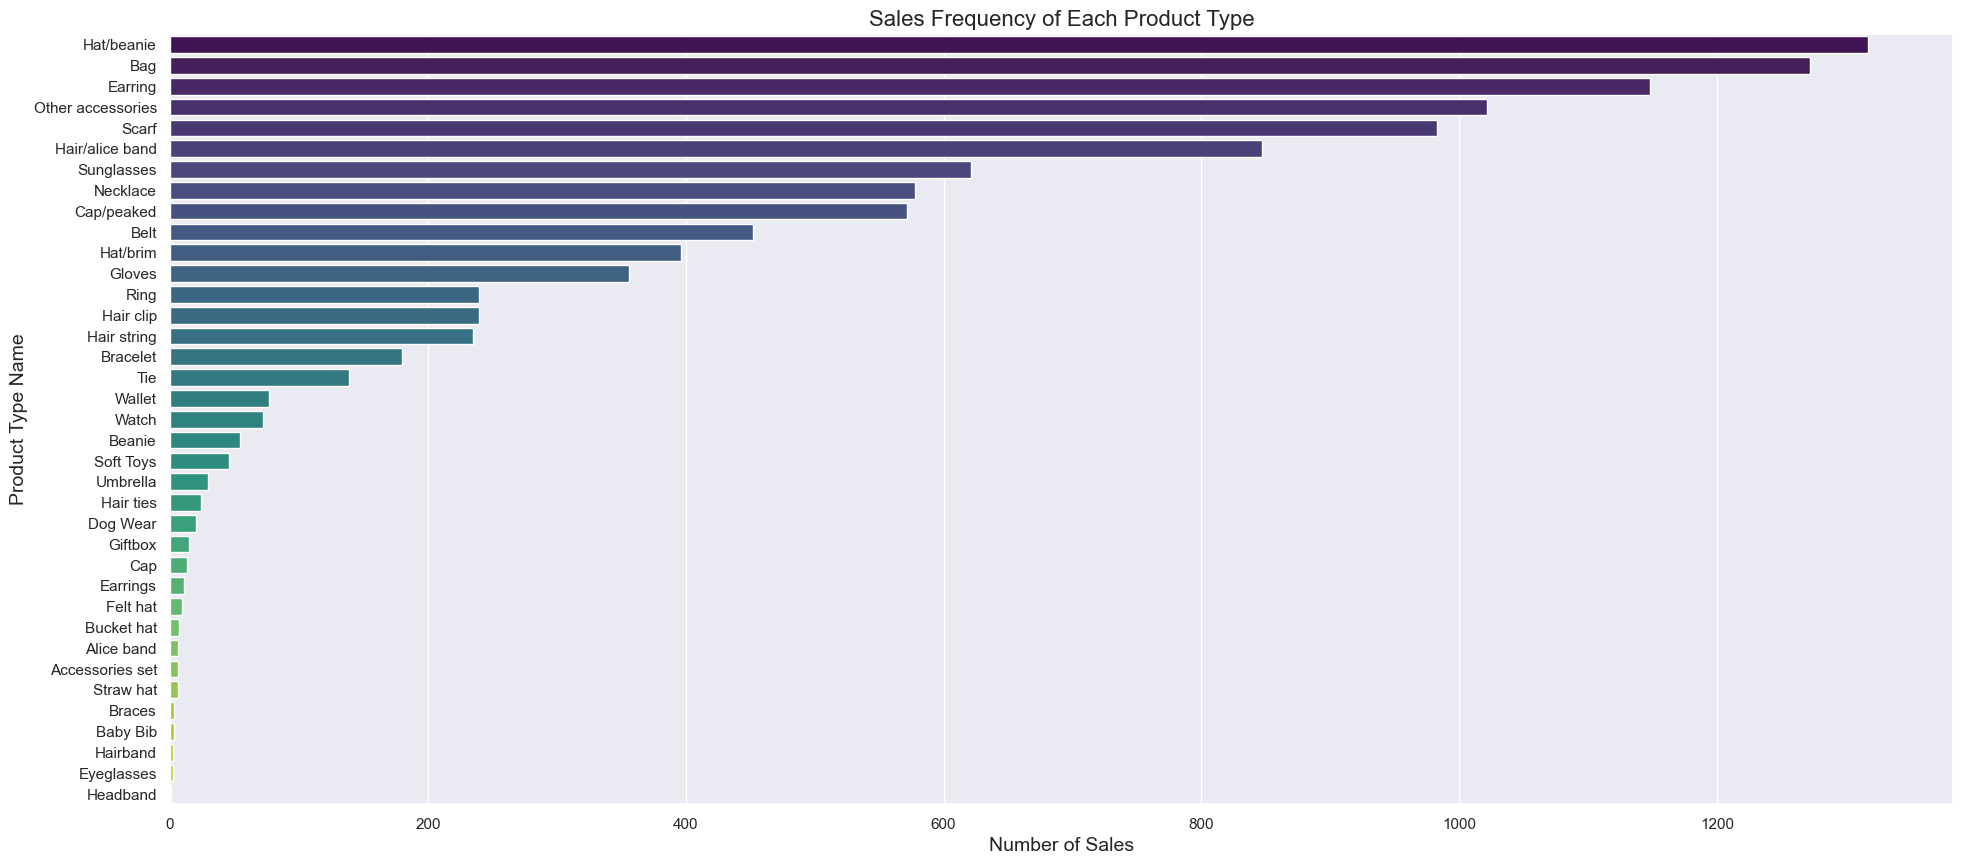

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

product_counts = merged_df2['product_type_name'].value_counts()

plt.figure(figsize=(23,10))
sns.barplot(y=product_counts.index, x=product_counts.values, palette="viridis")
plt.xlabel('Number of Sales', fontsize=14)
plt.ylabel('Product Type Name', fontsize=14)
plt.title('Sales Frequency of Each Product Type', fontsize=16)
plt.show()

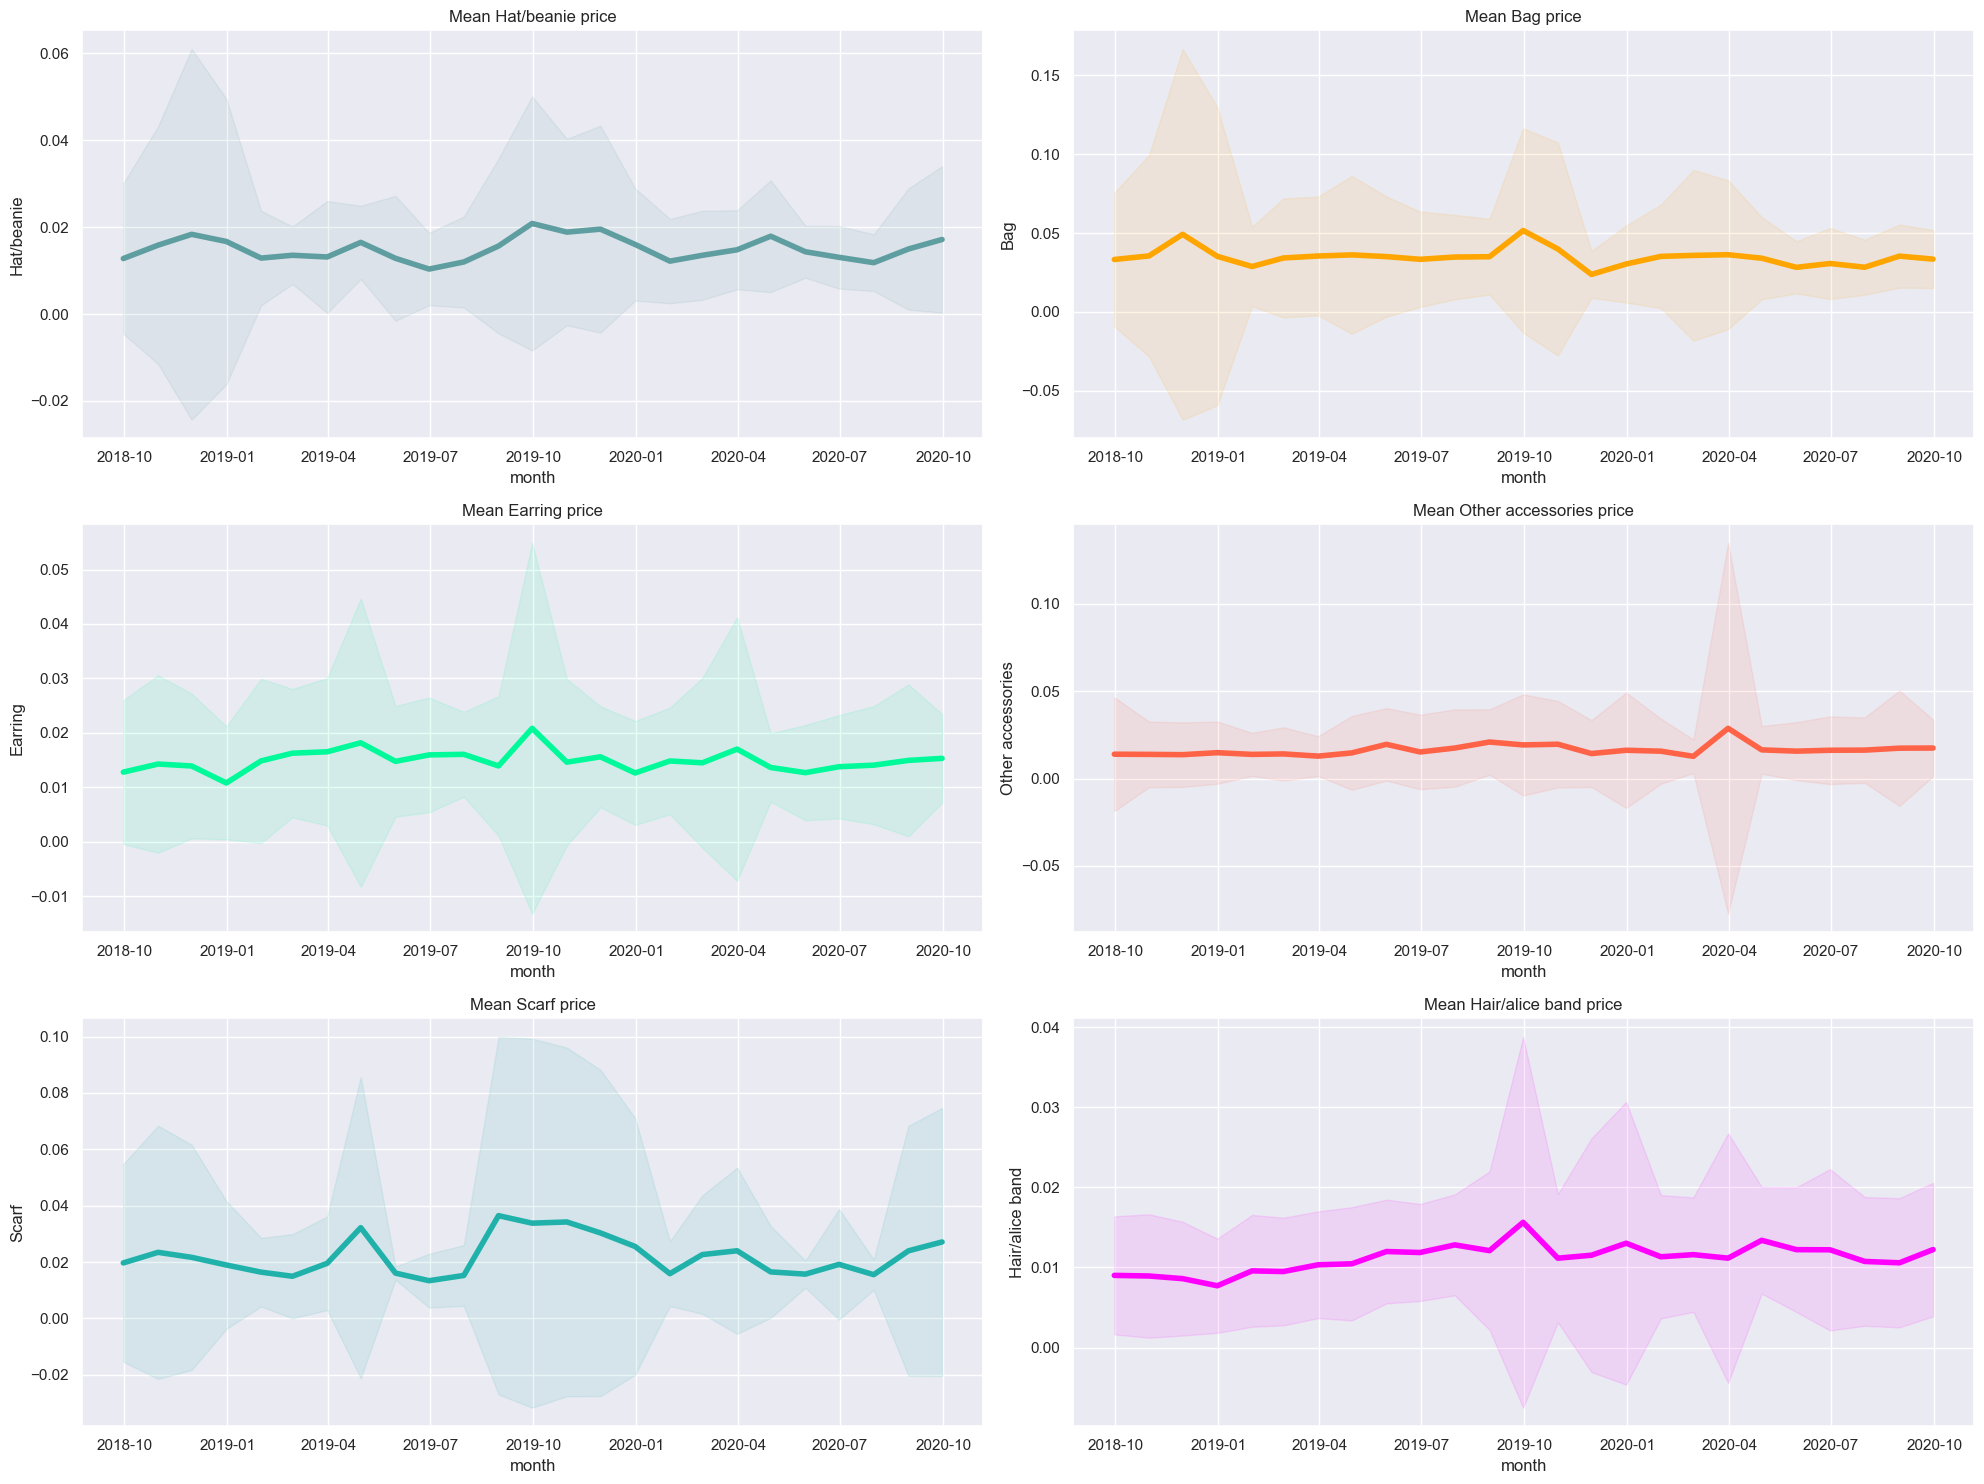

In [73]:
import matplotlib.pyplot as plt

# 상위 6개 제품의 가격 추세 변환
merged_df2['t_dat'] = pd.to_datetime(merged_df2['t_dat'])

top_products = merged_df2['product_type_name'].value_counts().head(6).index.tolist()

colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen', 'magenta']
f, ax = plt.subplots(3, 2, figsize=(20, 15))
k = 0

for i in range(3):
    for j in range(2):
        try:
            product = top_products[k]
            product_data = merged_df2[merged_df2.product_type_name == product]
            
            series_mean = product_data[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
            series_std = product_data[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, 
                                  (series_mean.values-2*series_std.values).ravel(), 
                                  (series_mean.values+2*series_std.values).ravel(), 
                                  color=colors[k], alpha=.1)
            ax[i, j].set_title(f'Mean {product} price')
            ax[i, j].set_xlabel('month')
            ax[i, j].set_ylabel(f'{product}')
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)

plt.tight_layout()
plt.show()


#10월~12월 가격 평균이 크게 증가하거나 감소한다.

#2020년 4월에 크게 가격 변화가 컸는데 조사해보니 h&m에서 '가먼트 콜렉팅 위크' 이벤트진행
# 패션 재활용 옷을 가게에 가져오면 쿠폰을 지급했다.


In [74]:
merged_df2.tail()

,t_dat,customer_id,article_id,price,sales_channel_id,product_type_name,section_name,age
10999,2020-09-22,8992b48ec192bb65d5c1fc24736514757a35525929f1dd...,933974001,0.027102,2,Hat/beanie,Men H&M Sport,48.0
11000,2020-09-22,95c528ca0b76b066f203e7abe470ddcf3777c6810e4e29...,881049002,0.008458,1,Gloves,Womens Big accessories,60.0
11001,2020-09-22,ad3f0f61f71e1bdf425bbdd45bc9c9915bf35e12c7d294...,936600001,0.013542,2,Other accessories,Womens Small accessories,34.0
11002,2020-09-22,c0247cf307c024f4c13395e3fa451d7c2a355d40d35271...,933607001,0.013542,2,Belt,Womens Big accessories,30.0
11003,2020-09-22,d687d5a0850cd842ec8ad704ffd533d7f681a1ab22b837...,942035001,0.013542,2,Ring,Womens Small accessories,36.0


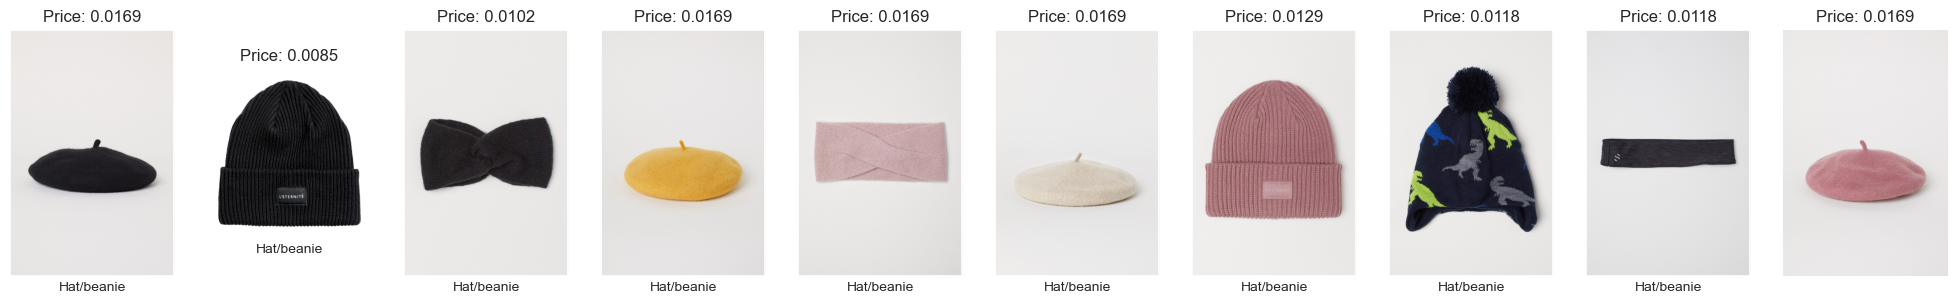

In [134]:
#Hat/beanie 제품 가격 상위 5개 이미지 출력

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Hat/beanie에 해당하는 article_id를 필터링
hat_beanie_articles = merged_df2[merged_df2['product_type_name'] == 'Hat/beanie']

# 시각화 준비
f, ax = plt.subplots(1, 10, figsize=(25,10))
i = 0

for _, data in hat_beanie_articles.iterrows():
    if i >= 10:  
        break
    
    desc = str(data['product_type_name'])  # 'product_type_name'을 설명으로 사용
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 4 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    
    img_path = f'D:/머신러닝 프로젝트/h-and-m-personalized-fashion-recommendations (1)/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg'
    img = mpimg.imread(img_path)
    ax[i].imshow(img)
    ax[i].set_title(f'Price: {data.price:.4f}')
    ax[i].set_xlabel(desc, fontsize=10)
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    i += 1

plt.axis('off')
plt.show()



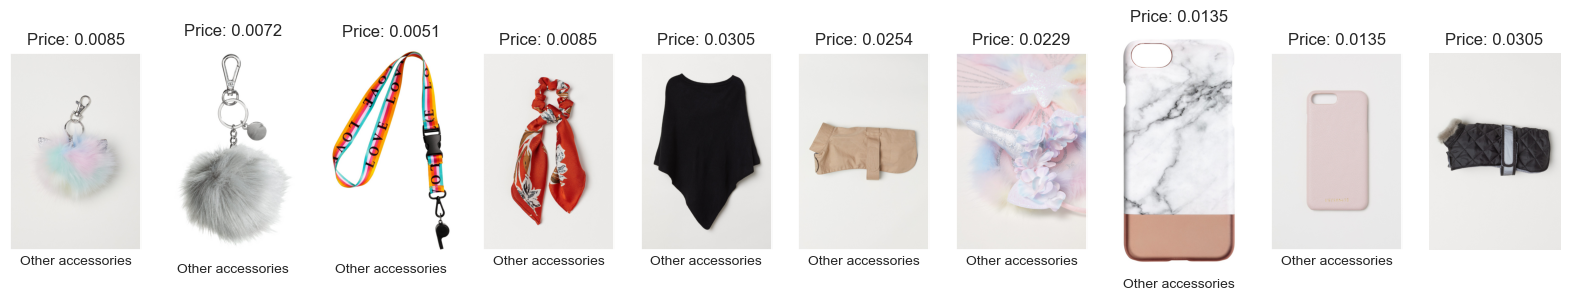

In [76]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Hat/beanie에 해당하는 article_id를 필터링
hat_beanie_articles = merged_df2[merged_df2['product_type_name'] == 'Other accessories']


f, ax = plt.subplots(1, 10, figsize=(20,10))
i = 0

for _, data in hat_beanie_articles.iterrows():
    if i >= 10:  
        break
    
    desc = str(data['product_type_name'])  
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 4 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    
    img_path = f'D:/머신러닝 프로젝트/h-and-m-personalized-fashion-recommendations (1)/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg'
    img = mpimg.imread(img_path)
    ax[i].imshow(img)
    ax[i].set_title(f'Price: {data.price:.4f}')
    ax[i].set_xlabel(desc, fontsize=10)
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    i += 1

plt.axis('off')
plt.show()


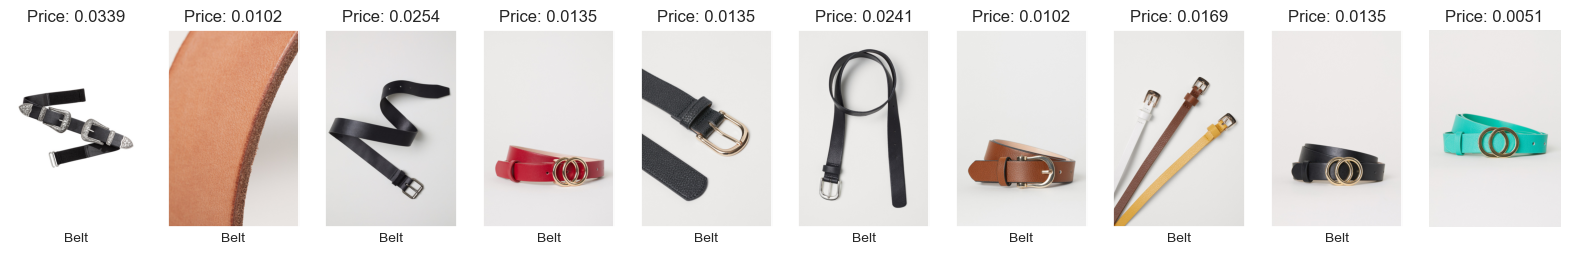

In [77]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


hat_beanie_articles = merged_df2[merged_df2['product_type_name'] == 'Belt']

# 시각화 준비
f, ax = plt.subplots(1, 10, figsize=(20,10))
i = 0

for _, data in hat_beanie_articles.iterrows():
    if i >= 10:  
        break
    
    desc = str(data['product_type_name'])  
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 4 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    
    img_path = f'D:/머신러닝 프로젝트/h-and-m-personalized-fashion-recommendations (1)/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg'
    img = mpimg.imread(img_path)
    ax[i].imshow(img)
    ax[i].set_title(f'Price: {data.price:.4f}')
    ax[i].set_xlabel(desc, fontsize=10)
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    i += 1

plt.axis('off')
plt.show()


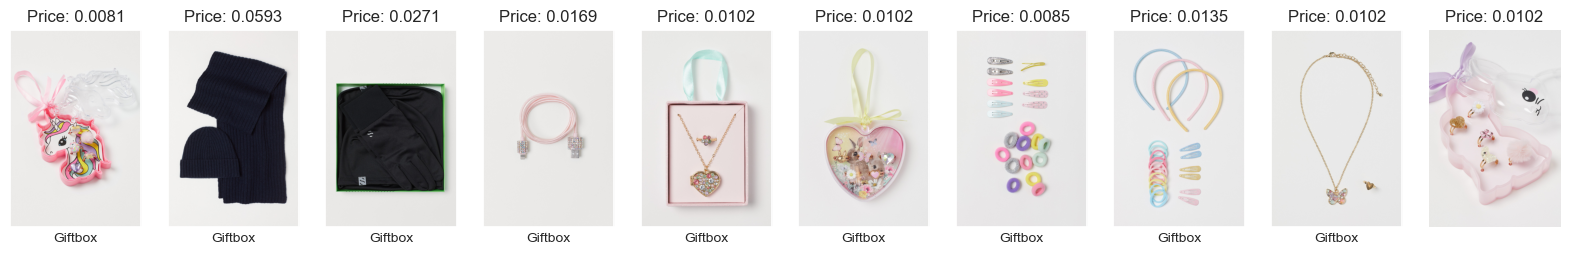

In [78]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


hat_beanie_articles = merged_df2[merged_df2['product_type_name'] == 'Giftbox']


f, ax = plt.subplots(1, 10, figsize=(20,10))
i = 0

for _, data in hat_beanie_articles.iterrows():
    if i >= 10:  
        break
    
    desc = str(data['product_type_name']) 
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 4 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    
    img_path = f'D:/머신러닝 프로젝트/h-and-m-personalized-fashion-recommendations (1)/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg'
    img = mpimg.imread(img_path)
    ax[i].imshow(img)
    ax[i].set_title(f'Price: {data.price:.4f}')
    ax[i].set_xlabel(desc, fontsize=10)
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    i += 1

plt.axis('off')
plt.show()


# 연령별 제품 

In [90]:
# 10대~20대 나누기
age = [15,19,29,39,49,59,69,79,89,99]
merged_df2['ge'] = pd.cut(merged_df2['age'], age, labels=['10s', '20s', '30s', '40s', '50s','60s', '70s','80s','90s'])
merged_df2.head(5)

,t_dat,customer_id,article_id,price,sales_channel_id,product_type_name,section_name,age,ge
0,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,553139001,0.033881,2,Belt,Womens Big accessories,22.0,20s
1,2018-09-20,002b3c0a44a22c45a8d62ea9d2b88d1a89e335f8b84003...,673531001,0.008458,2,Other accessories,"Kids Accessories, Swimwear & D",38.0,30s
2,2018-09-20,00401a367c5ac085cb9d4b77c56f3edcabf25153615db9...,633675001,0.010153,2,Hair/alice band,"Kids Accessories, Swimwear & D",28.0,20s
3,2018-09-20,005c9fb2ba6c49b2098a662f64a9124ef95cbec5fcf4eb...,560783010,0.005068,2,Bag,Divided Accessories,46.0,40s
4,2018-09-20,005c9fb2ba6c49b2098a662f64a9124ef95cbec5fcf4eb...,660150001,0.005068,2,Bracelet,Men Accessories,46.0,40s


### 10~90대 제품판매량 확인

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


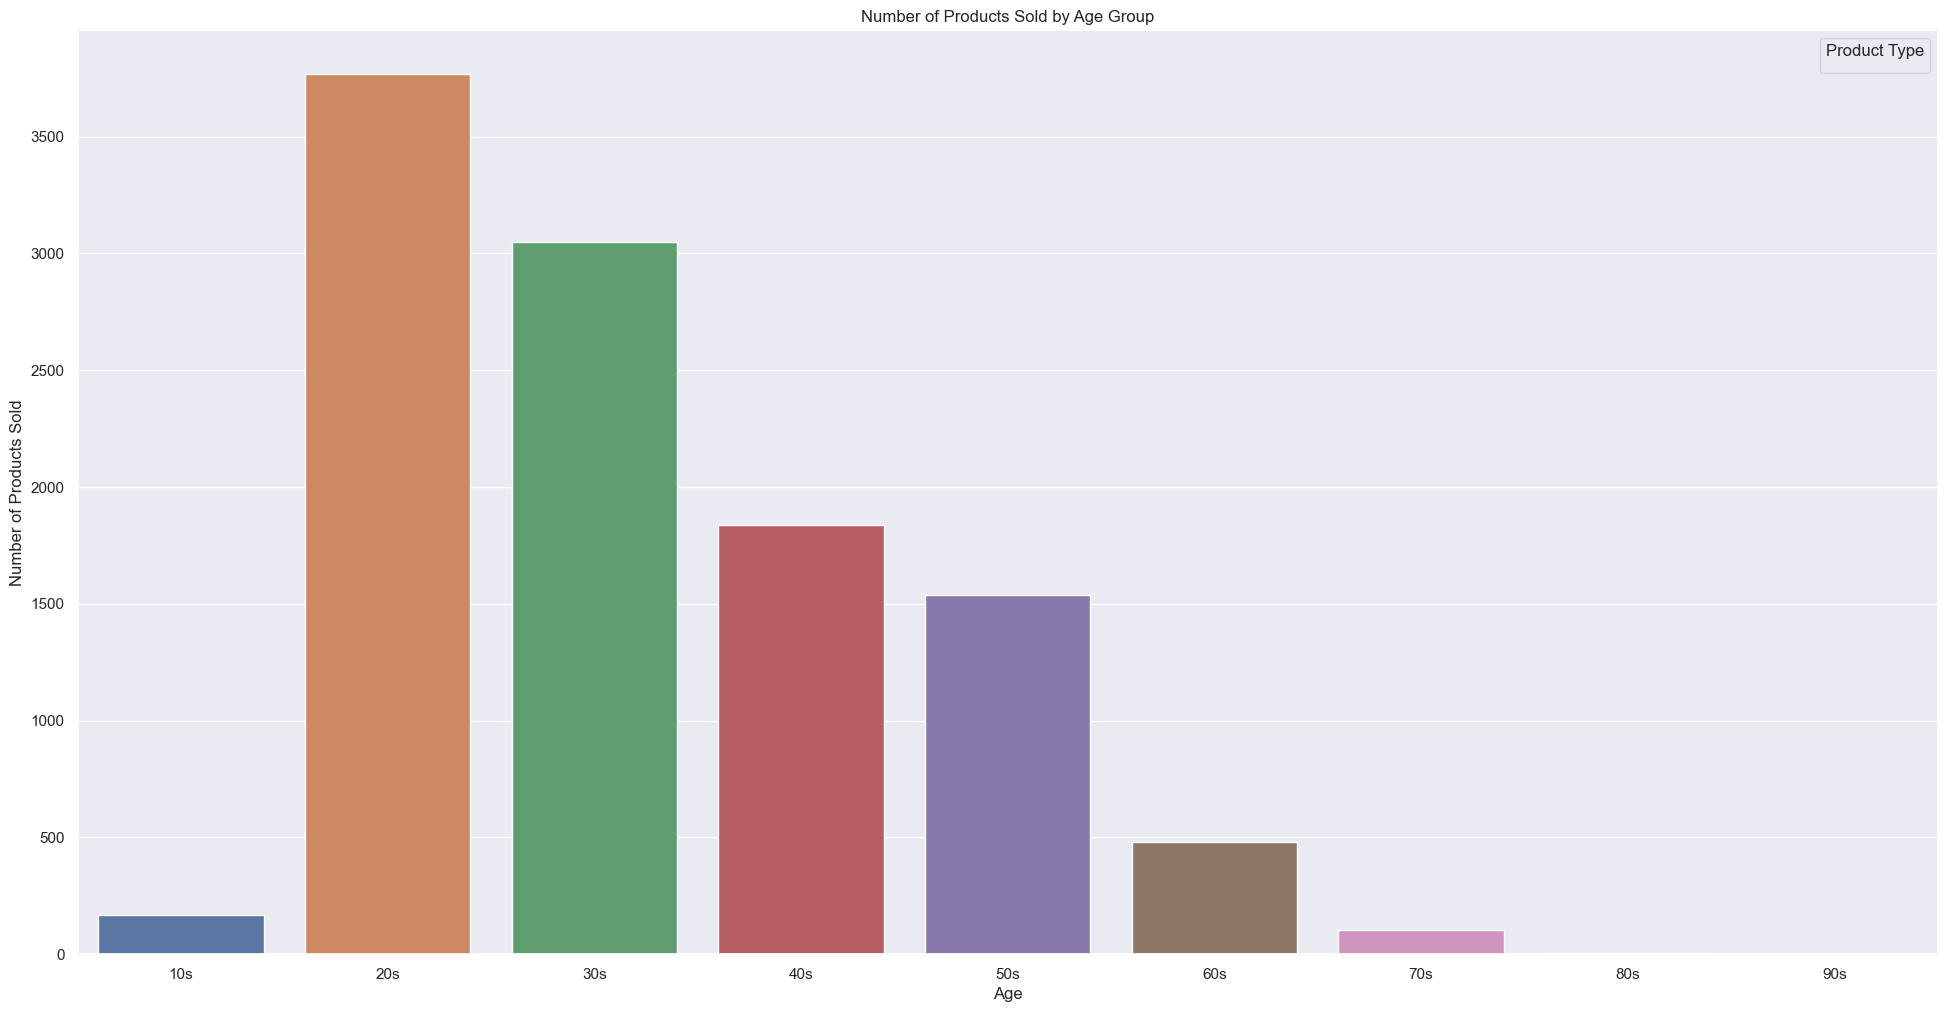

In [102]:
# 10~90대 제품 판매 그래프 간단하게 그리기

plt.figure(figsize=(24,12))
sns.countplot(data=merged_df2, x='ge', order=['10s','20s','30s','40s','50s','60s','70s','80s','90s'])
plt.title('Number of Products Sold by Age Group')
plt.ylabel('Number of Products Sold')
plt.xlabel('Age')
plt.legend(loc='upper right', title='Product Type')
plt.show()

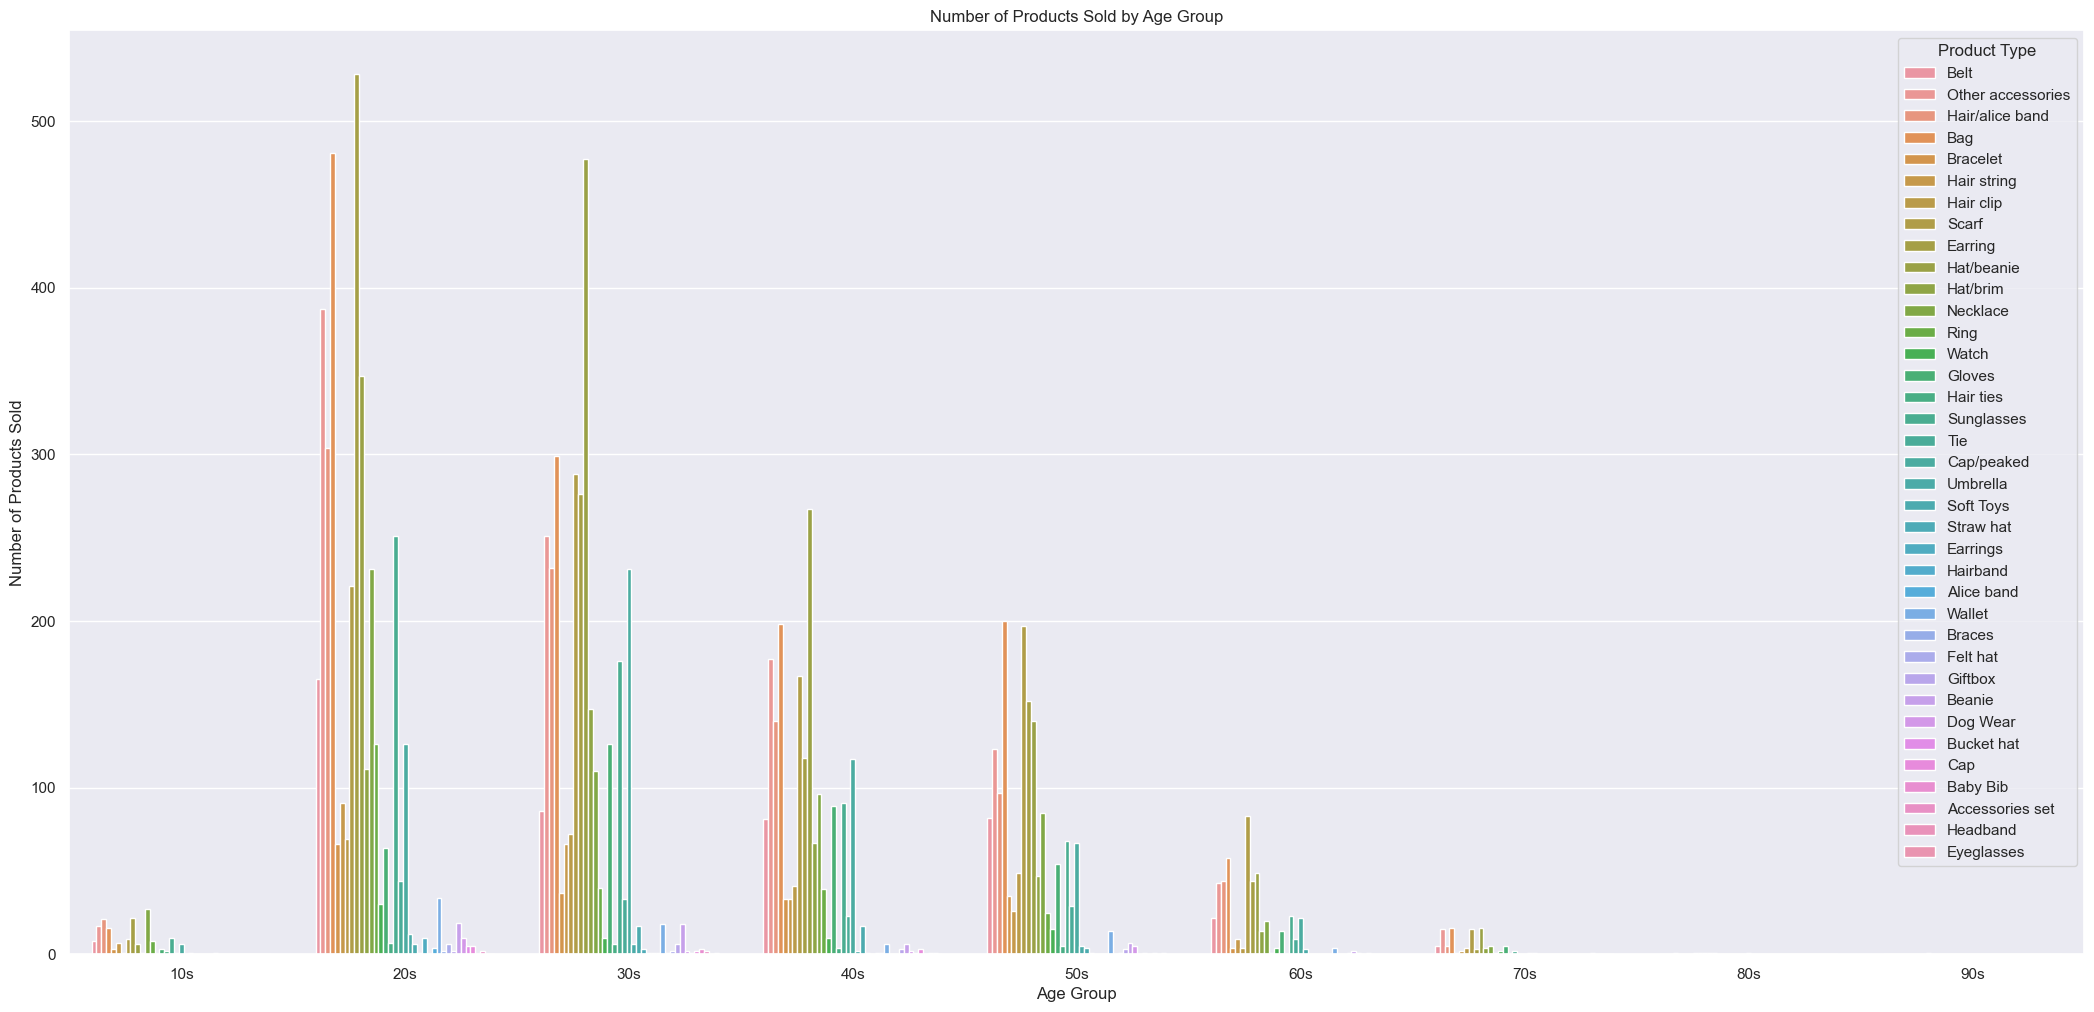

In [98]:
#연령별 제품종류 판매 그래프 전체 

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(26, 12))
sns.countplot(data=merged_df2, x='ge', hue='product_type_name', order=['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s'])
plt.title('Number of Products Sold by Age Group')
plt.ylabel('Number of Products Sold')
plt.xlabel('Age Group')
plt.legend(loc='upper right', title='Product Type')
plt.show()

# 70~90대 상품 판매량

In [104]:
#총 112개 데이터 존재
merged_df2[merged_df2['ge'].isin(['70s','80s','90s'])]


,t_dat,customer_id,article_id,price,sales_channel_id,product_type_name,section_name,age,ge
5,2018-09-20,00873fc0f81215241785b49518e6758a2c26c0eac4825e...,633755001,0.006763,1,Hair string,"Kids Accessories, Swimwear & D",78.0,70s
28,2018-09-20,03264406f2f5ad204e822bf1de35bfd78a254b7ebfa743...,552617006,0.028797,1,Watch,Womens Small accessories,74.0,70s
203,2018-09-20,1eda7e372de9cabad2e4040332621ef0aba8d993c006a5...,626346003,0.016932,2,Scarf,Womens Big accessories,70.0,70s
204,2018-12-07,1eda7e372de9cabad2e4040332621ef0aba8d993c006a5...,620425016,0.008458,2,Hair/alice band,Womens Small accessories,70.0,70s
382,2018-09-20,3bb525364ebc9892b4856419584f76876caf6dcaf6f87d...,633017001,0.042356,2,Bag,Womens Big accessories,72.0,70s
...,...,...,...,...,...,...,...,...,...
10514,2020-08-10,97eecc81bbf120e9e2d67e9253cadbccc3a6105a539745...,702368018,0.030492,2,Other accessories,Divided Accessories,70.0,70s
10623,2020-08-20,c26fd0eeda5a44a980768753ba32f3de9426568f913452...,925402001,0.008458,2,Other accessories,Collaborations,71.0,70s
10935,2020-09-16,7eacad51202b2636fdea273e4052288f30b1486f4eab95...,888475002,0.022017,2,Hair/alice band,Womens Big accessories,70.0,70s
10947,2020-09-17,1851e1e7467fb30b9af9f3e0a9cded632e3418d60681d1...,919553001,0.041356,1,Bag,Divided Accessories,82.0,80s


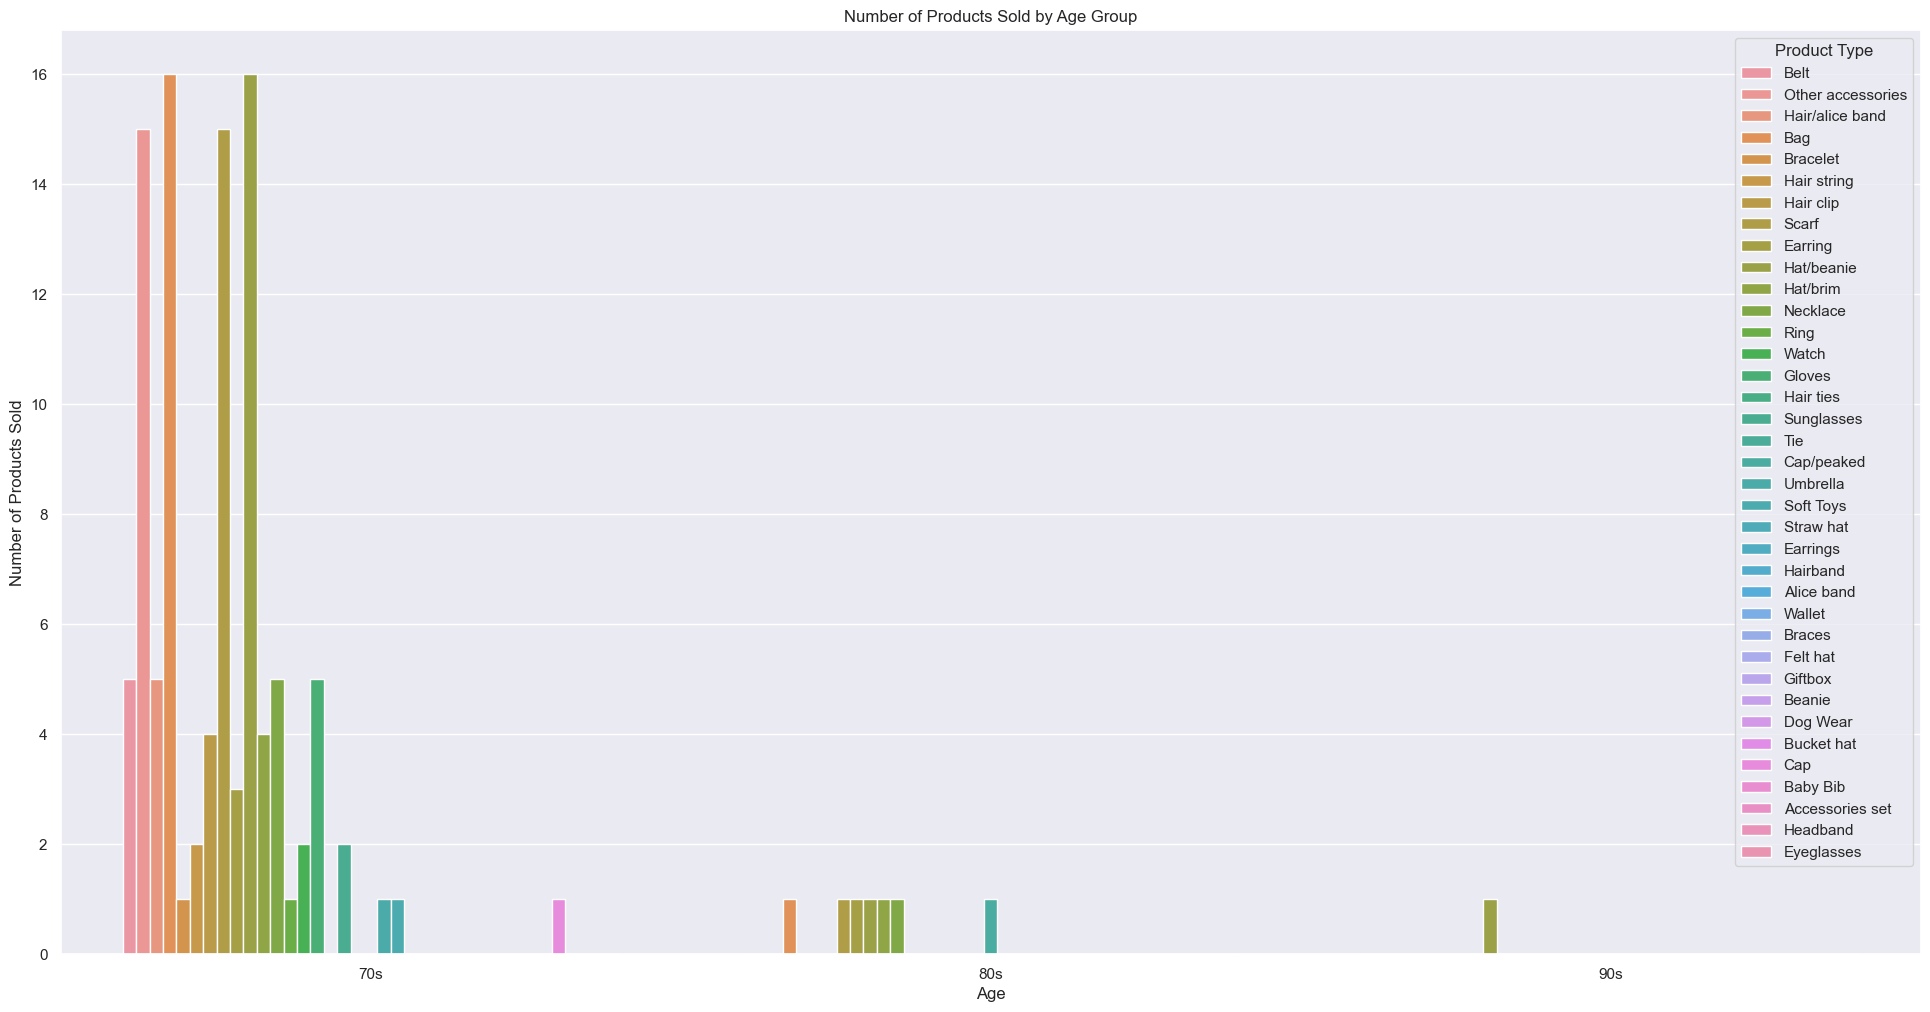

In [108]:
# 80~90대의 구입 건수가 제일 적었다.
plt.figure(figsize=(24,12))
sns.countplot(data=merged_df2, x='ge',hue='product_type_name' ,order=['70s','80s','90s'])
plt.title('Number of Products Sold by Age Group')
plt.ylabel('Number of Products Sold')
plt.xlabel('Age')
plt.legend(loc='upper right', title='Product Type')
plt.show()

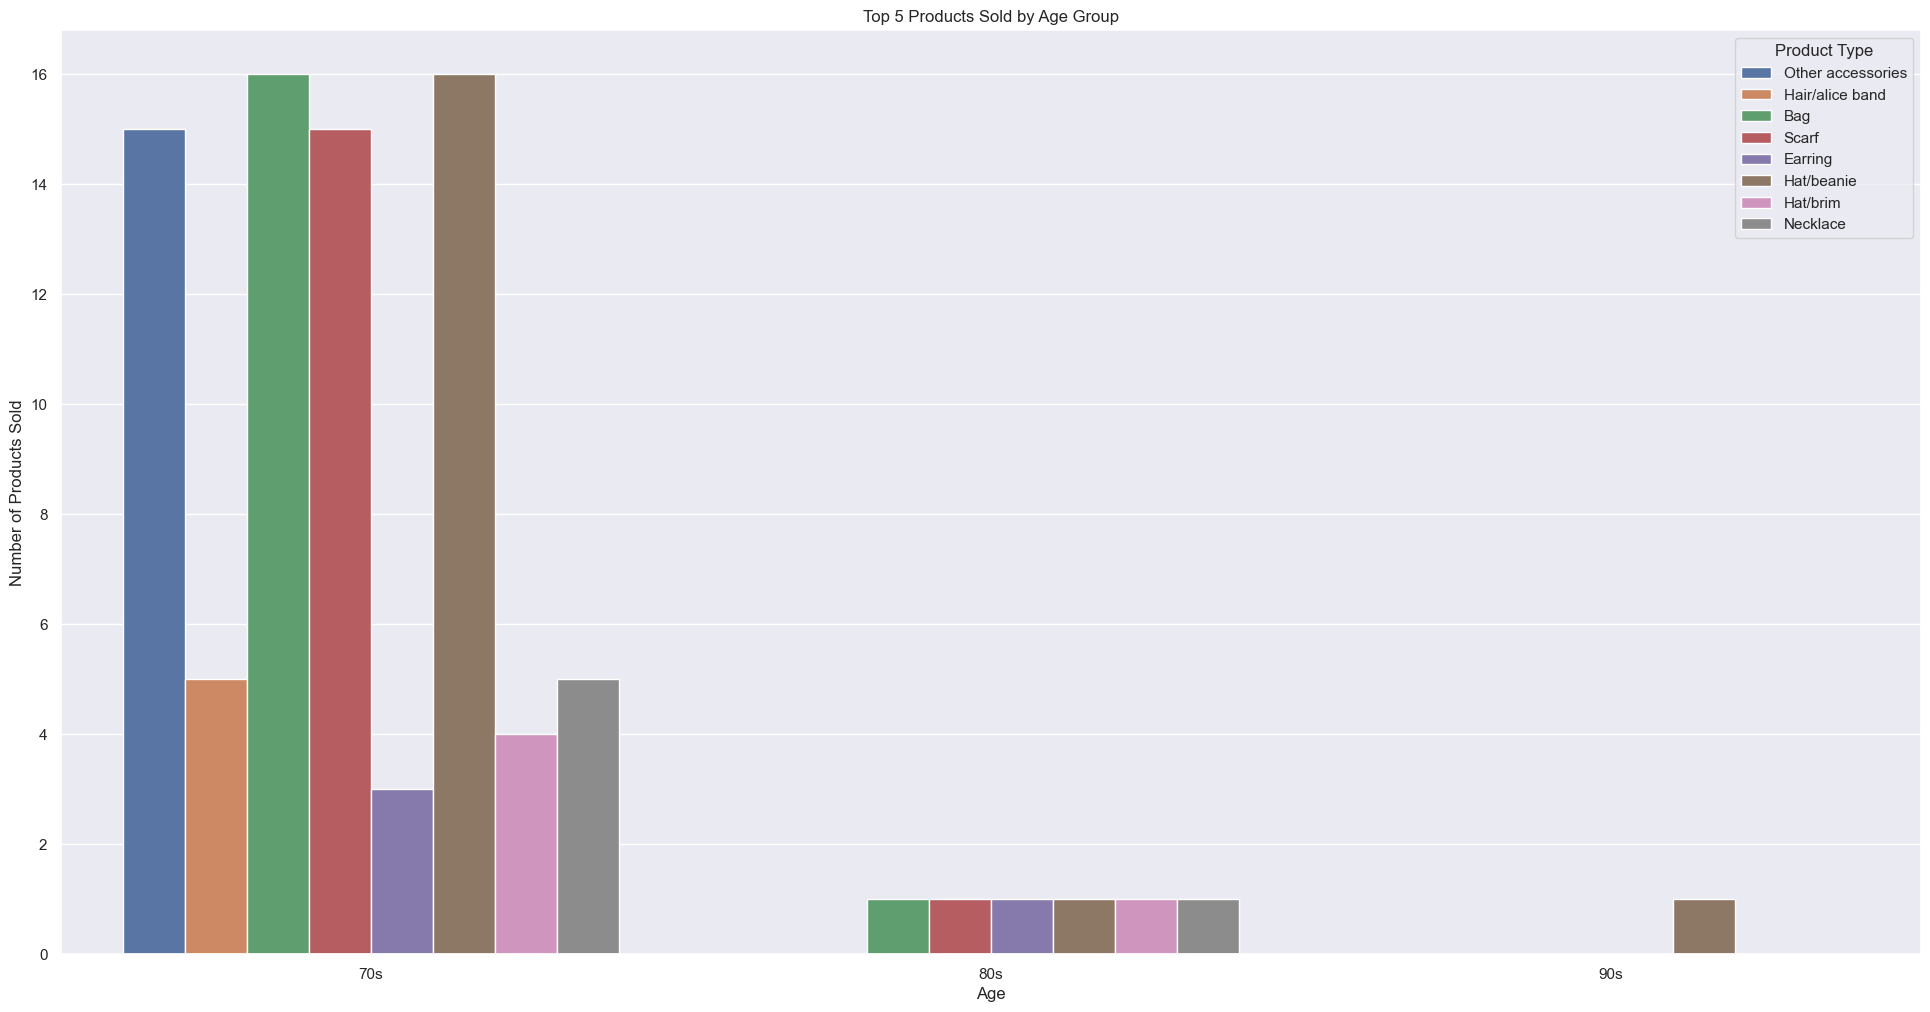

In [112]:
top_5_products_70s = merged_df2[merged_df2['ge'] =='70s']['product_type_name'].value_counts().head(5).index.tolist()
top_5_products_80s = merged_df2[merged_df2['ge'] == '80s']['product_type_name'].value_counts().head(5).index.tolist()
top_5_products_90s = merged_df2[merged_df2['ge'] =='90s']['product_type_name'].value_counts().head(5).index.tolist()
top_5_products_all = set(top_5_products_70s + top_5_products_80s + top_5_products_90s)
filtered_data = merged_df2[merged_df2['product_type_name'].isin(top_5_products_all)]

plt.figure(figsize=(24,12))
sns.countplot(data=filtered_data, x='ge', hue='product_type_name', order=['70s', '80s', '90s'])
plt.title('Top 5 Products Sold by Age Group')
plt.ylabel('Number of Products Sold')
plt.xlabel('Age')
plt.legend(loc='upper right', title='Product Type')
plt.show()


#70대 기준 출력결과  (80~90대는 데이터가 적습니다.) 
#공통 1위 Bag, 모자
#공통 2위 Scarf와, Other accessories(열쇠고리(사원증? 고리), Scratchmittens(아기얼굴 스크래치 방지 장갑), 여우목돌이, 스포츠 속옷)



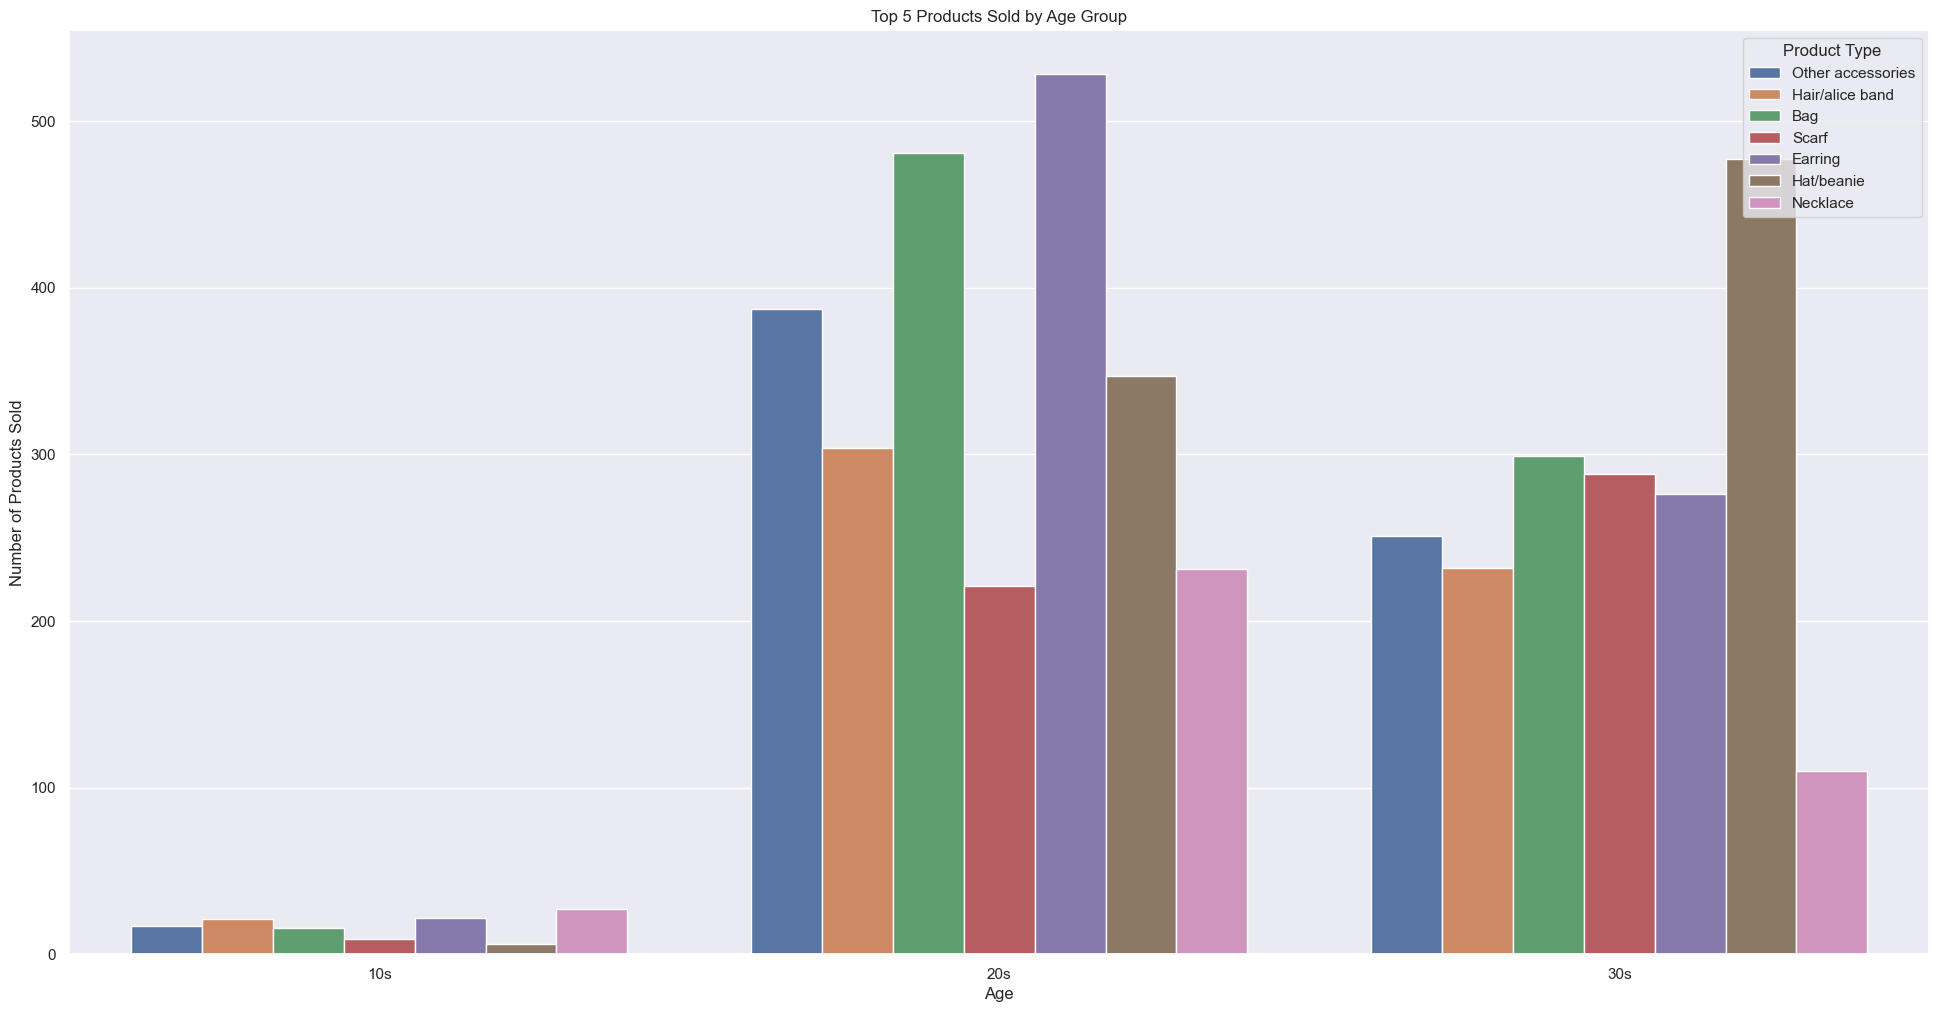

In [113]:
top_5_products_10s = merged_df2[merged_df2['ge'] =='10s']['product_type_name'].value_counts().head(5).index.tolist()
top_5_products_20s = merged_df2[merged_df2['ge'] == '20s']['product_type_name'].value_counts().head(5).index.tolist()
top_5_products_30s = merged_df2[merged_df2['ge'] =='30s']['product_type_name'].value_counts().head(5).index.tolist()
top_5_products_all = set(top_5_products_10s + top_5_products_20s + top_5_products_30s)
filtered_data = merged_df2[merged_df2['product_type_name'].isin(top_5_products_all)]

plt.figure(figsize=(24,12))
sns.countplot(data=filtered_data, x='ge', hue='product_type_name', order=['10s', '20s', '30s'])
plt.title('Top 5 Products Sold by Age Group')
plt.ylabel('Number of Products Sold')
plt.xlabel('Age')
plt.legend(loc='upper right', title='Product Type')
plt.show()

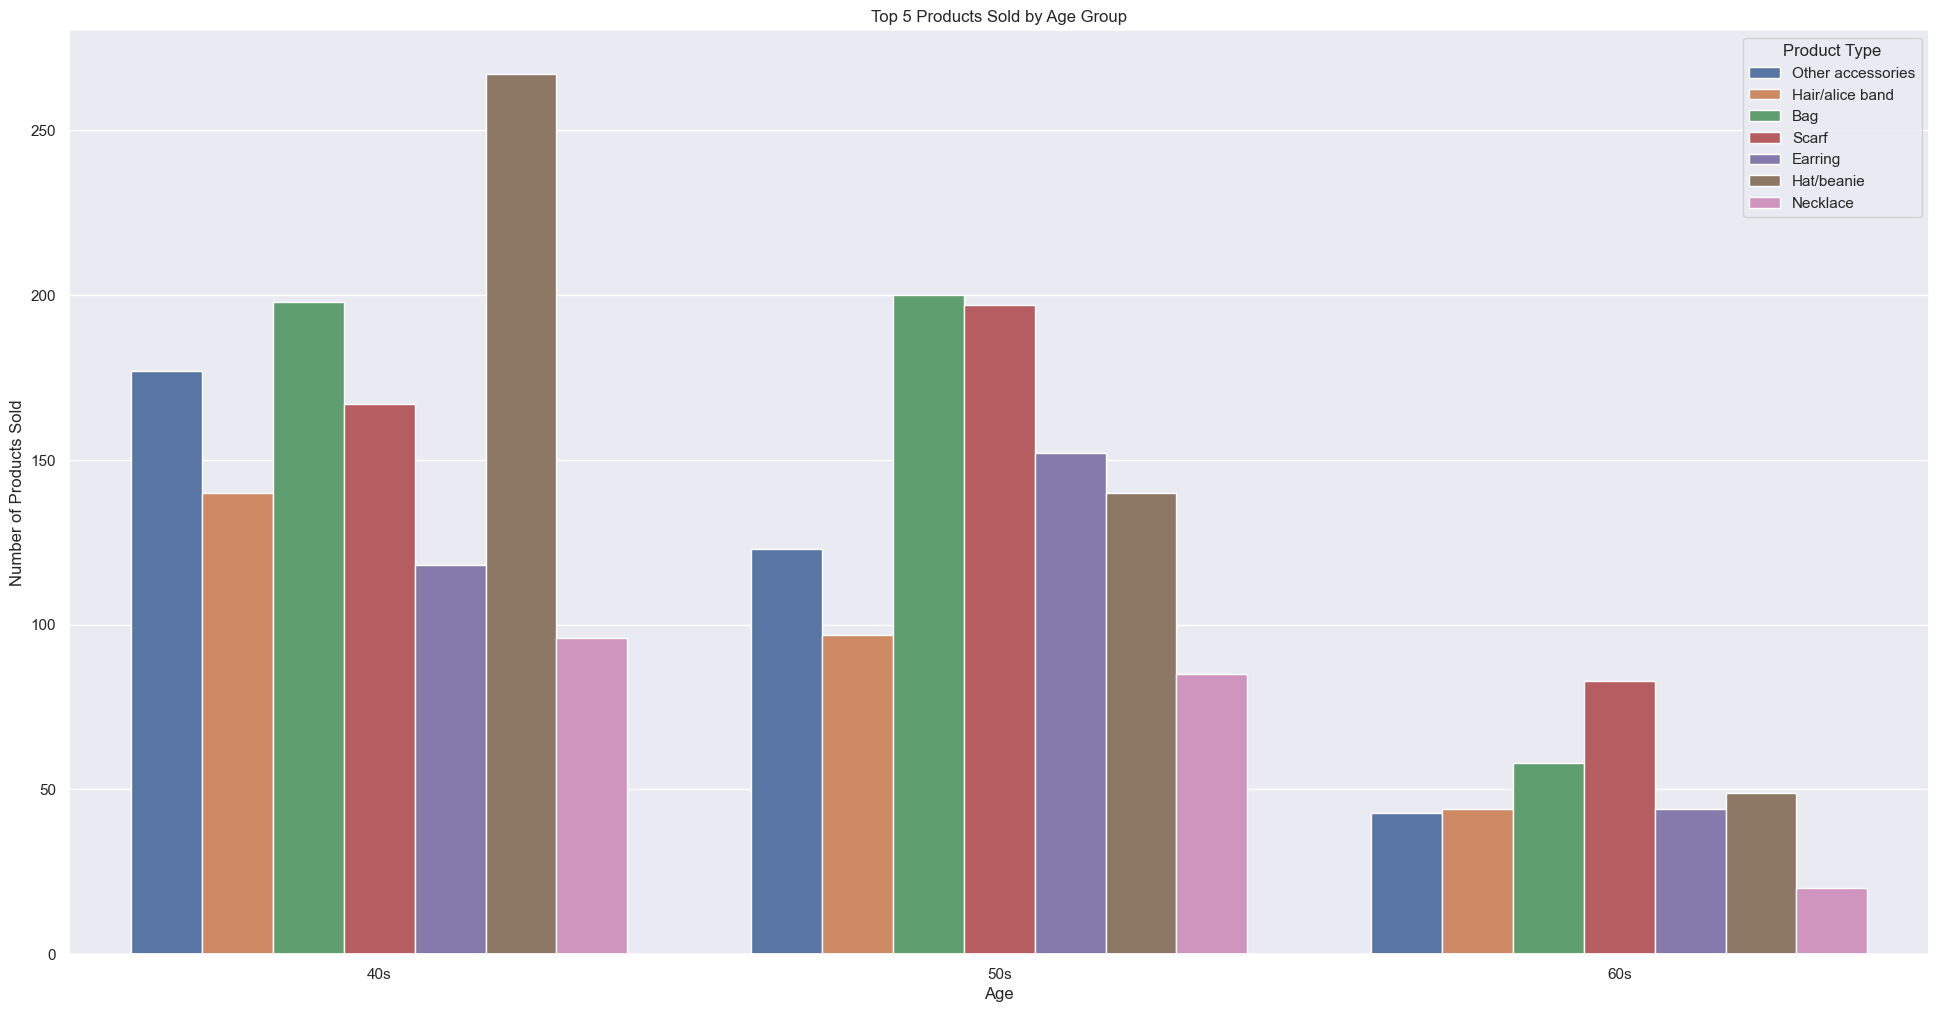

In [114]:
top_5_products_40s = merged_df2[merged_df2['ge'] =='40s']['product_type_name'].value_counts().head(5).index.tolist()
top_5_products_50s = merged_df2[merged_df2['ge'] == '50s']['product_type_name'].value_counts().head(5).index.tolist()
top_5_products_60s = merged_df2[merged_df2['ge'] =='60s']['product_type_name'].value_counts().head(5).index.tolist()
top_5_products_all = set(top_5_products_10s + top_5_products_20s + top_5_products_30s)
filtered_data = merged_df2[merged_df2['product_type_name'].isin(top_5_products_all)]

plt.figure(figsize=(24,12))
sns.countplot(data=filtered_data, x='ge', hue='product_type_name', order=['40s', '50s', '60s'])
plt.title('Top 5 Products Sold by Age Group')
plt.ylabel('Number of Products Sold')
plt.xlabel('Age')
plt.legend(loc='upper right', title='Product Type')
plt.show()

In [115]:
merged_df2.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_type_name,section_name,age,ge
0,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,553139001,0.033881,2,Belt,Womens Big accessories,22.0,20s
1,2018-09-20,002b3c0a44a22c45a8d62ea9d2b88d1a89e335f8b84003...,673531001,0.008458,2,Other accessories,"Kids Accessories, Swimwear & D",38.0,30s
2,2018-09-20,00401a367c5ac085cb9d4b77c56f3edcabf25153615db9...,633675001,0.010153,2,Hair/alice band,"Kids Accessories, Swimwear & D",28.0,20s


# 연령과 section_name 시각화

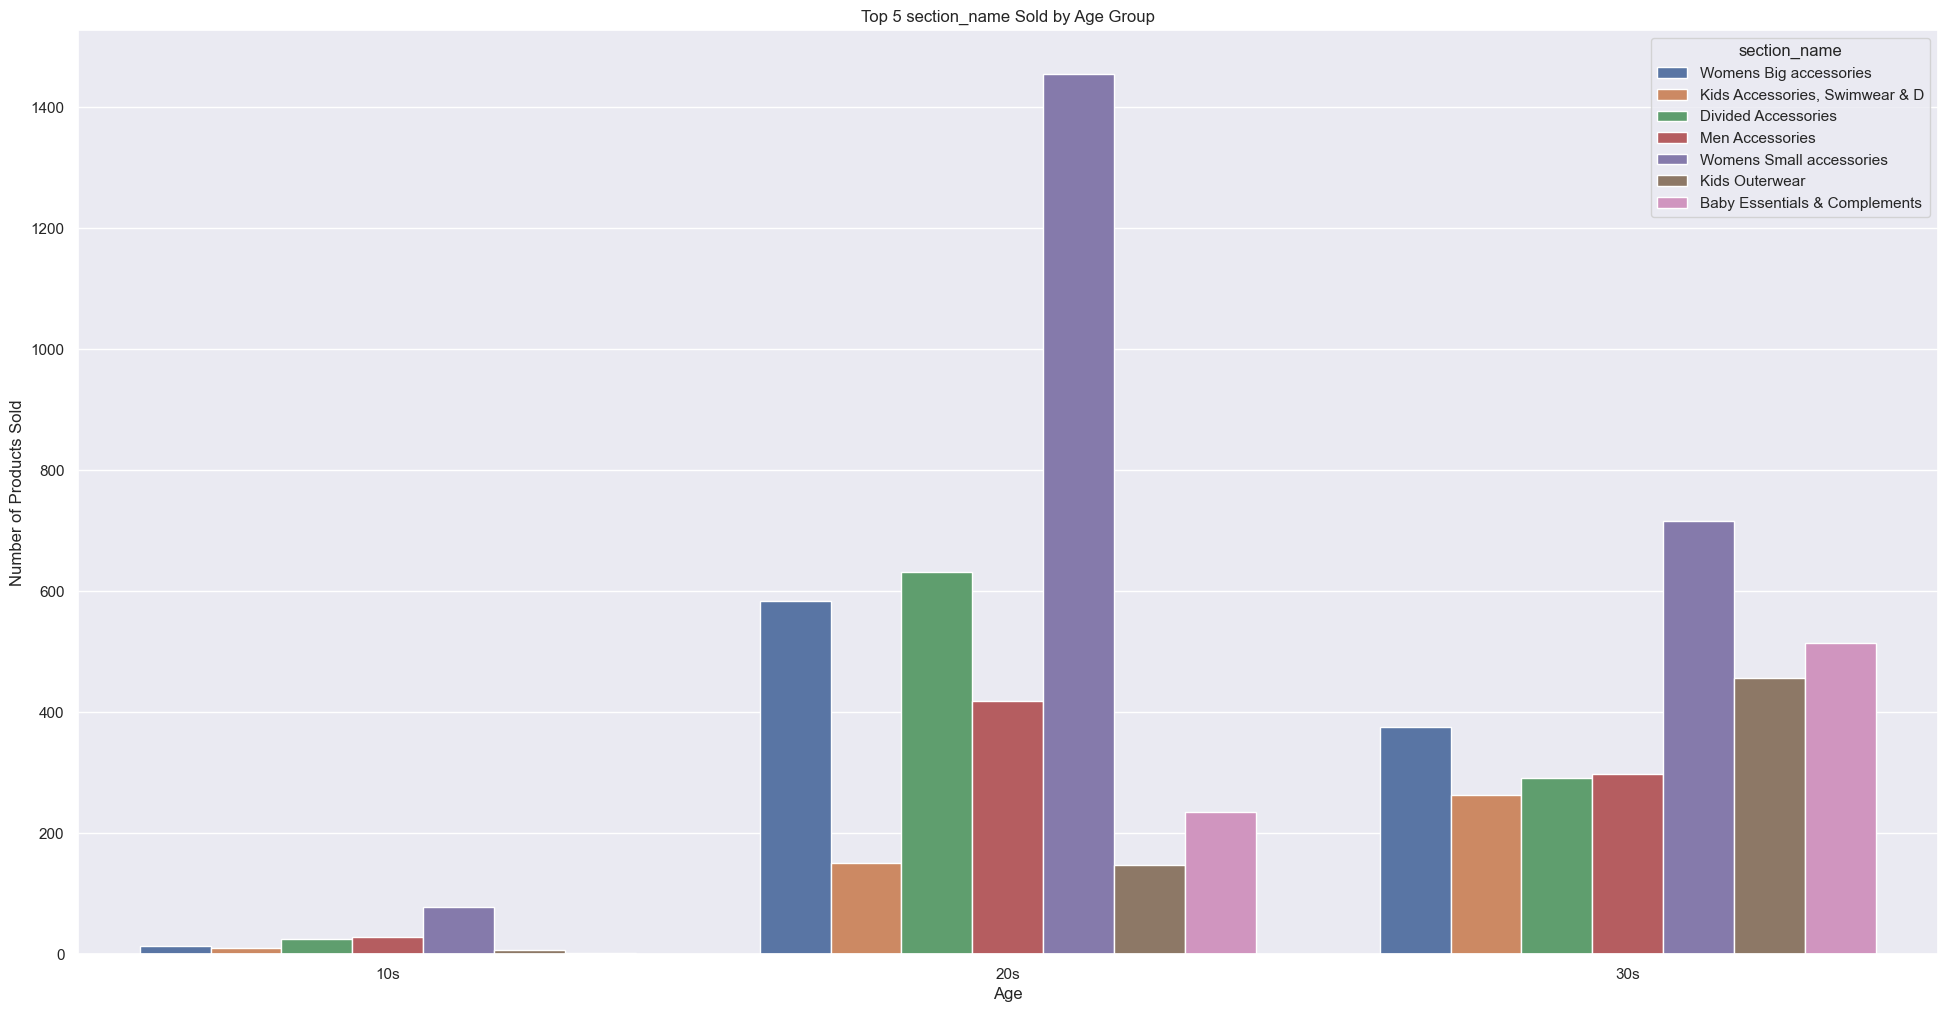

In [116]:
top_5_section_names_10s = merged_df2[merged_df2['ge'] =='10s']['section_name'].value_counts().head(5).index.tolist()
top_5_section_name_20s = merged_df2[merged_df2['ge'] == '20s']['section_name'].value_counts().head(5).index.tolist()
top_5_section_name_30s = merged_df2[merged_df2['ge'] =='30s']['section_name'].value_counts().head(5).index.tolist()
top_5_products_all = set(top_5_section_names_10s + top_5_section_name_20s + top_5_section_name_30s)
filtered_data = merged_df2[merged_df2['section_name'].isin(top_5_products_all)]

plt.figure(figsize=(24,12))
sns.countplot(data=filtered_data, x='ge', hue='section_name', order=['10s', '20s', '30s'])
plt.title('Top 5 section_name Sold by Age Group')
plt.ylabel('Number of Products Sold')
plt.xlabel('Age')
plt.legend(loc='upper right', title='section_name')
plt.show()



#20대의 경우  Women Big accessories가 1위, 2위 Divided Accessories 3위 Women Big accessories
#20대 상품의 경우 여성 엑세서리가 높은 비중을 차지했습니다.

#30대의 1위 Womens Small accessories 2위Baby Essential & complements  3위 kid Outerwear
#30대의 경우 유아 용품이 많이 팔렸습니다


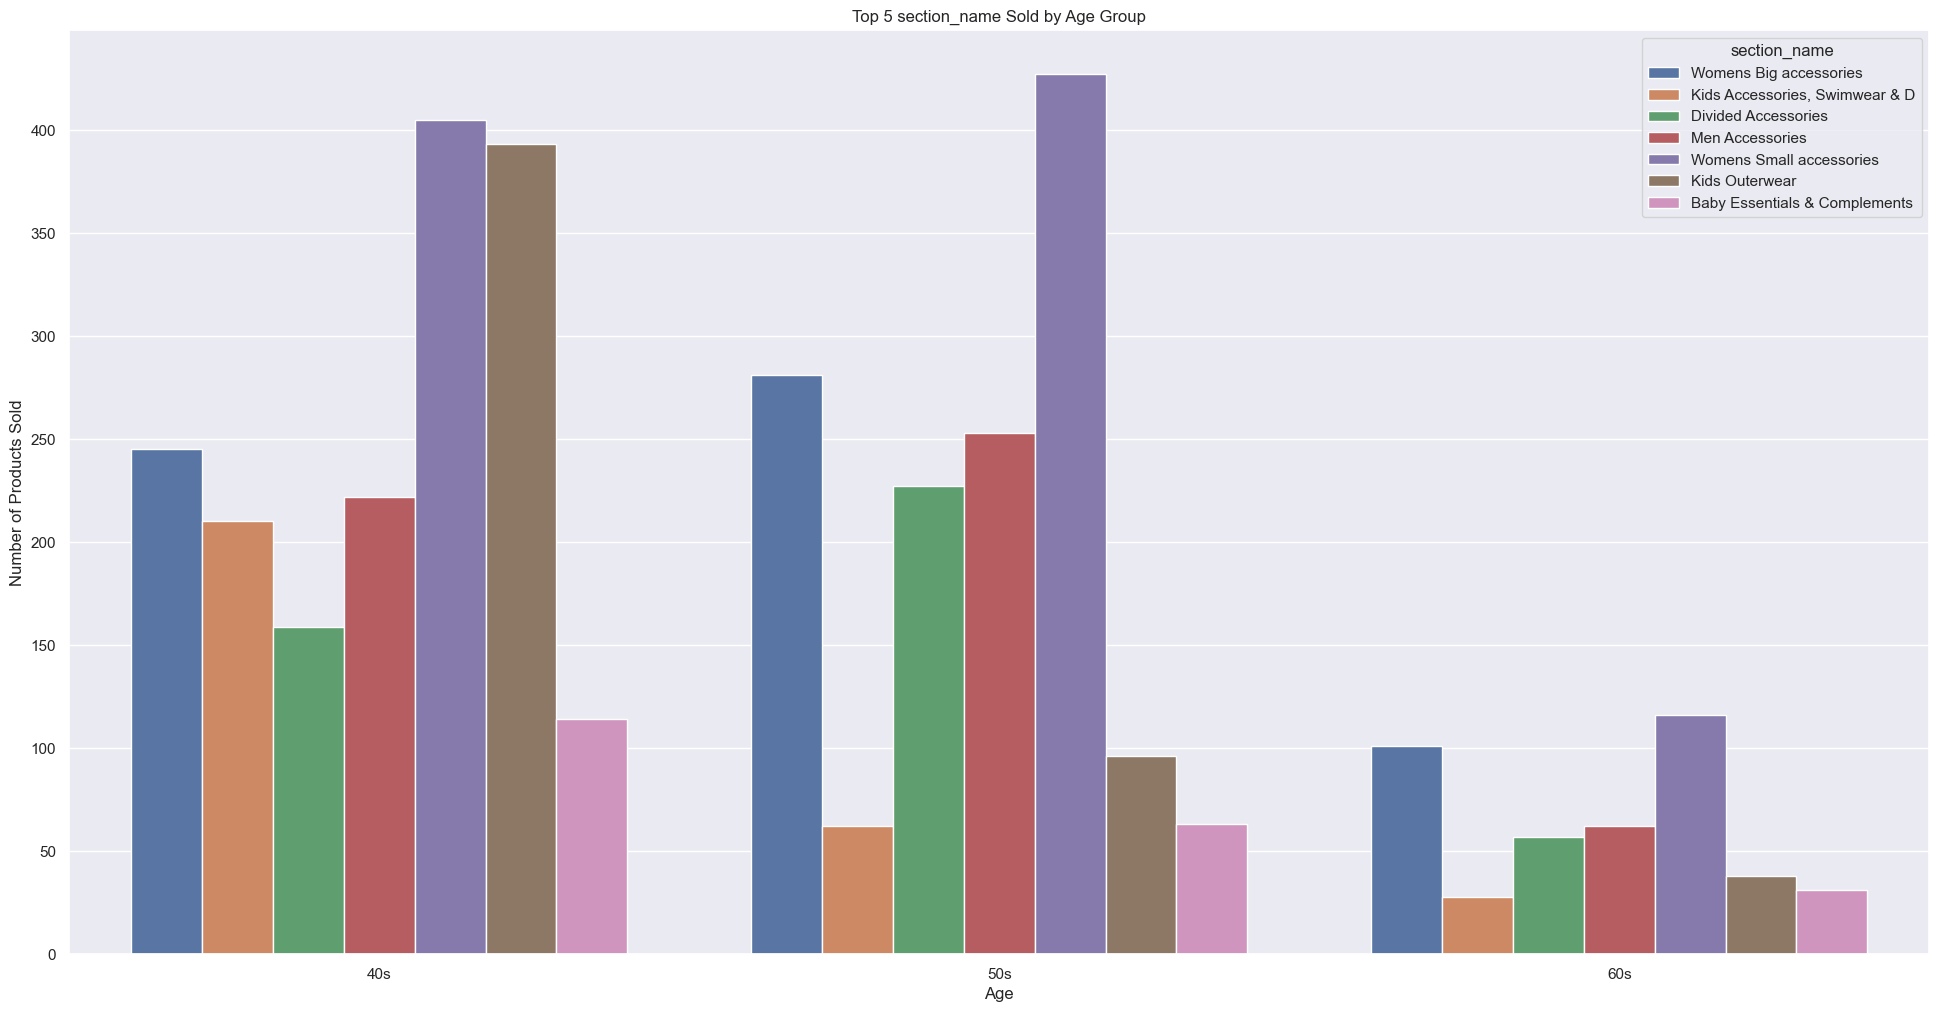

In [117]:
top_5_section_names_40s = merged_df2[merged_df2['ge'] =='40s']['section_name'].value_counts().head(5).index.tolist()
top_5_section_name_50s = merged_df2[merged_df2['ge'] == '50s']['section_name'].value_counts().head(5).index.tolist()
top_5_section_name_60s = merged_df2[merged_df2['ge'] =='60s']['section_name'].value_counts().head(5).index.tolist()
top_5_products_all = set(top_5_section_names_10s + top_5_section_name_20s + top_5_section_name_30s)
filtered_data = merged_df2[merged_df2['section_name'].isin(top_5_products_all)]

plt.figure(figsize=(24,12))
sns.countplot(data=filtered_data, x='ge', hue='section_name', order=['40s', '50s', '60s'])
plt.title('Top 5 section_name Sold by Age Group')
plt.ylabel('Number of Products Sold')
plt.xlabel('Age')
plt.legend(loc='upper right', title='section_name')
plt.show()

#40대 1위 Women Big accessories 2위 kids Outerwear 3위 Womens Big accesories
#40대의 경우 여성 악세서리가 많이 팔렸습니다.


#50대 1위 Womens Small accessories, 2위 women Big accessories 3위 Men Accessories
#20~40 대와 비교하여 남성 악세서리 판매량이 가장 많습니다.

#60대 1위 Womens Small accessories, 2위 Womens Big accessories, 3위 Men Accessories
# 판매량이 급격히 감소하였고 여성 악세서리 제품이 많이 팔렸습니다.


In [128]:
merged_df2

,t_dat,customer_id,article_id,price,sales_channel_id,product_type_name,section_name,age,ge
0,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,553139001,0.033881,2,Belt,Womens Big accessories,22.0,20s
1,2018-09-20,002b3c0a44a22c45a8d62ea9d2b88d1a89e335f8b84003...,673531001,0.008458,2,Other accessories,"Kids Accessories, Swimwear & D",38.0,30s
2,2018-09-20,00401a367c5ac085cb9d4b77c56f3edcabf25153615db9...,633675001,0.010153,2,Hair/alice band,"Kids Accessories, Swimwear & D",28.0,20s
3,2018-09-20,005c9fb2ba6c49b2098a662f64a9124ef95cbec5fcf4eb...,560783010,0.005068,2,Bag,Divided Accessories,46.0,40s
4,2018-09-20,005c9fb2ba6c49b2098a662f64a9124ef95cbec5fcf4eb...,660150001,0.005068,2,Bracelet,Men Accessories,46.0,40s
...,...,...,...,...,...,...,...,...,...
10999,2020-09-22,8992b48ec192bb65d5c1fc24736514757a35525929f1dd...,933974001,0.027102,2,Hat/beanie,Men H&M Sport,48.0,40s
11000,2020-09-22,95c528ca0b76b066f203e7abe470ddcf3777c6810e4e29...,881049002,0.008458,1,Gloves,Womens Big accessories,60.0,60s
11001,2020-09-22,ad3f0f61f71e1bdf425bbdd45bc9c9915bf35e12c7d294...,936600001,0.013542,2,Other accessories,Womens Small accessories,34.0,30s
11002,2020-09-22,c0247cf307c024f4c13395e3fa451d7c2a355d40d35271...,933607001,0.013542,2,Belt,Womens Big accessories,30.0,30s


# 월별 판매량 집계

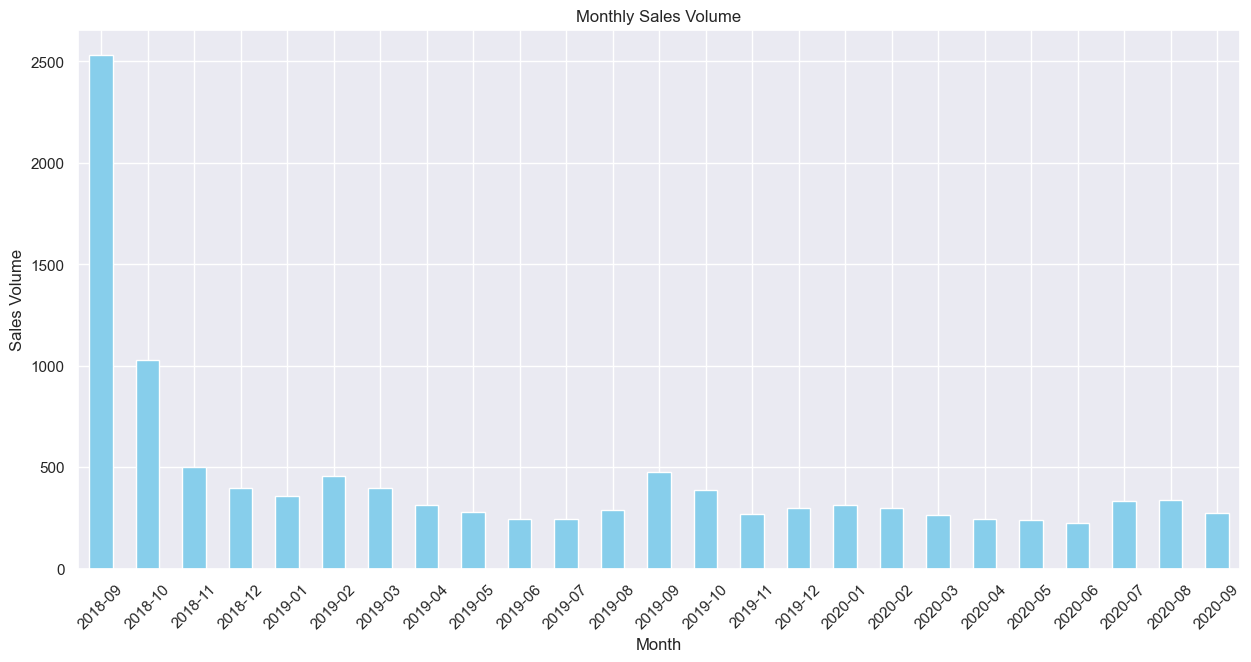

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

# t_dat 컬럼의 데이터 타입을 datetime으로 변환
merged_df2['t_dat'] = pd.to_datetime(merged_df2['t_dat'])

# 월 정보만 저장하는 새로운 컬럼 'month' 생성
merged_df2['month'] = merged_df2['t_dat'].dt.to_period('M')

# 월별 판매량 집계
monthly_sales = merged_df2.groupby('month').size()

# 결과 시각화
plt.figure(figsize=(15, 7))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales Volume')
plt.xlabel('Month')
plt.ylabel('Sales Volume')
plt.xticks(rotation=45)
plt.show()
